In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso
import re
import math
warnings.filterwarnings('ignore')
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
import os
from xgboost import XGBRegressor
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler

In [5]:
data = pd.read_excel('RCR Sales Data.xlsx', sheet_name = 'Sheet1')
data.columns

Index(['Month', 'COUNTRY', 'DATASOURCENAME', 'FORMFACTORGROUP', 'FORMFACTOR',
       'SUBFORMFACTOR', 'FAMILY', 'SUBFAMILY', 'MODEL_DESCRIPTION', 'OEMGROUP',
       'OS_EDITION', 'Operating_System_Summary', 'Windows_OS_Group',
       'SCREEN_SIZE_INCHES', 'SCREEN_RESOLUTION', 'TOUCHSCREEN', 'VERTICAL',
       'HORIZONTAL', 'KEYBOARD', 'CPU_BRAND', 'CPU_MODEL', 'CPU_MHz',
       'CPU_CORES', 'GPU_BRAND', 'GPU_MODEL', 'RAM_MB', 'STORAGE_TYPE',
       'HD_CAPACITY_GB', 'SD_CAPACITY_GB', 'STORAGE_CAPACITY',
       'PREMIUM_DEVICE_SPEC', 'GAMINGPRODUCTS', 'REVENUE_EUR', 'REVENUE_LC',
       'OS_VERSION', 'CPU_GROUP', 'Sales_units', 'Sales_value'],
      dtype='object')

In [6]:
backup_data = data

In [7]:
data.rename(columns={'Sales_units':'UNITS','Sales_value':'REVENUE'},inplace=True)

In [8]:
print('1. Shape of the DataFrame')
ads = data[['FORMFACTORGROUP','FORMFACTOR','SUBFORMFACTOR','OEMGROUP','FAMILY', 'SUBFAMILY', 'MODEL_DESCRIPTION','OS_EDITION','Operating_System_Summary','Windows_OS_Group','SCREEN_SIZE_INCHES','SCREEN_RESOLUTION','TOUCHSCREEN','VERTICAL','HORIZONTAL','KEYBOARD','CPU_BRAND','CPU_MODEL','CPU_MHz','CPU_CORES','GPU_BRAND','GPU_MODEL','RAM_MB','STORAGE_TYPE','HD_CAPACITY_GB','SD_CAPACITY_GB','STORAGE_CAPACITY','PREMIUM_DEVICE_SPEC','GAMINGPRODUCTS','UNITS','REVENUE','REVENUE_EUR','REVENUE_LC','OS_VERSION','CPU_GROUP']]
ads.shape

1. Shape of the DataFrame


(180429, 35)

In [9]:
ads = ads[(ads['SUBFORMFACTOR']=='Traditional Notebook') | (ads['SUBFORMFACTOR']=='UltraSlim Notebook') | (ads['SUBFORMFACTOR']=='Ultraslim Notebook') | (ads['SUBFORMFACTOR']=='Detachable') | (ads['SUBFORMFACTOR']=='Convertible')]

In [10]:
ads = ads[ads['Operating_System_Summary']=='Windows OS']

In [11]:
print("Number of Null in Columns")
ads.isna().sum()

Number of Null in Columns


FORMFACTORGROUP                 0
FORMFACTOR                      0
SUBFORMFACTOR                   0
OEMGROUP                        0
FAMILY                          0
SUBFAMILY                       0
MODEL_DESCRIPTION               0
OS_EDITION                      0
Operating_System_Summary        0
Windows_OS_Group               21
SCREEN_SIZE_INCHES              0
SCREEN_RESOLUTION               0
TOUCHSCREEN                     0
VERTICAL                    10631
HORIZONTAL                  10631
KEYBOARD                        0
CPU_BRAND                       0
CPU_MODEL                       0
CPU_MHz                         0
CPU_CORES                       0
GPU_BRAND                       0
GPU_MODEL                       0
RAM_MB                          0
STORAGE_TYPE                    0
HD_CAPACITY_GB              71804
SD_CAPACITY_GB               2229
STORAGE_CAPACITY                0
PREMIUM_DEVICE_SPEC             0
GAMINGPRODUCTS                  0
UNITS         

In [12]:
print("Average Selling Price based on Units and Revenue")
ads['PRICE'] = round(ads['REVENUE']/ads['UNITS'],2)
ads['PRICE_EUR'] = round(ads['REVENUE_EUR']/ads['UNITS'],2)
ads['PRICE_LC'] = round(ads['REVENUE_LC']/ads['UNITS'],2)
# ads = ads.drop(columns = ['UNITS', 'REVENUE', 'REVENUE_EUR', 'REVENUE_LC', 'Windows_OS_Group', 'Operating_System_Summary','OS_VERSION'], axis = 1)
ads.head()

Average Selling Price based on Units and Revenue


,FORMFACTORGROUP,FORMFACTOR,SUBFORMFACTOR,OEMGROUP,FAMILY,SUBFAMILY,MODEL_DESCRIPTION,OS_EDITION,Operating_System_Summary,Windows_OS_Group,...,GAMINGPRODUCTS,UNITS,REVENUE,REVENUE_EUR,REVENUE_LC,OS_VERSION,CPU_GROUP,PRICE,PRICE_EUR,PRICE_LC
2252,PC Equivalent,Detachable,Detachable,All Other OEMs,All Other,All Other,All Other,Windows 10 Home,Windows OS,Windows Core,...,N.A.,0,0.00,0.000,0.00,Windows 10,CELERON,NaN,NaN,NaN
2357,PC Equivalent,Detachable,Detachable,Microsoft,Surface Book/Laptop Studio,Surface Book,Srfc Bk3 13ini5/8/256E CNR SC English US/Canad...,Windows 11,Windows OS,Windows Core,...,N.A.,3,899.00,792.036,899.00,Windows 11,I5,299.67,264.01,299.67
2358,PC Equivalent,Detachable,Detachable,Microsoft,Surface Book/Laptop Studio,Surface Book,Srfc Bk3 15in i7/32/2TBG SC English US/Canada,Windows 11,Windows OS,Windows Core,...,N.A.,28,92470.54,81468.252,92470.54,Windows 11,I7,3302.52,2909.58,3302.52
2365,PC Equivalent,Detachable,Detachable,Microsoft,Surface Book/Laptop Studio,Surface Book,Srfc Bk3 15ini7/32/512 G SC English US/Canada,Windows 11,Windows OS,Windows Core,...,N.A.,197,512345.08,451385.472,512345.08,Windows 11,I7,2600.74,2291.30,2600.74
2366,PC Equivalent,Detachable,Detachable,Microsoft,Surface Book/Laptop Studio,Surface Book,Surface Book 2 Core i7/8650U/1.9GHz 16384/256 ...,Windows 10 Pro,Windows OS,Windows Pro,...,NO GAMING,-14,-33896.00,-29863.002,-33896.00,Windows 10,CORE I7,2421.14,2133.07,2421.14


In [13]:
ads = ads[ads['PRICE']>0]
ads = ads[ads['UNITS']!=0]

In [14]:
print("Added Pixels Column | Screen Resolution")
ads['Pixels'] = ads['VERTICAL']*ads['HORIZONTAL']

Added Pixels Column | Screen Resolution


In [15]:
ads['OS_EDITION'].loc[ads['OS_EDITION'] == 'WIN10 HOME'] = 'Windows 10 Home'
ads['OS_EDITION'].loc[ads['OS_EDITION'] == 'WIN11 HOME'] = 'Windows 11 Home'
ads['OS_EDITION'].loc[ads['OS_EDITION'] == 'Windows 10'] = 'Windows 10 Home'
ads['OS_EDITION'].loc[ads['OS_EDITION'] == 'Windows 11'] = 'Windows 11 Home'
ads['OS_EDITION'].loc[ads['OS_EDITION'] == 'WIN10 HOME S'] = 'Windows 10 Home'
ads['OS_EDITION'].loc[ads['OS_EDITION'] == 'WIN11 HOME S'] = 'Windows 11 Home'
ads['OS_EDITION'].loc[ads['OS_EDITION'] == 'Windows 11s'] = 'Windows 11 Home'
ads['OS_EDITION'].loc[ads['OS_EDITION'] == 'WIN10 PRO'] = 'Windows 10 Pro'
ads['OS_EDITION'].loc[ads['OS_EDITION'] == 'WIN11 PRO'] = 'Windows 11 Pro'

print("\033[1mStandardizing\033[0m repetitive values within columns, such as addressing variations like '\033[1mWindows 10 Home\033[0m' and '\033[1mWin 10 Home\033[0m' in the \033[1mOS_EDITION\033[0m column, or '\033[1mCore i7\033[0m' and '\033[1mIntel Core i7\033[0m' in the \033[1mCPU_GROUP\033[0m column, to ensure consistency and uniformity.")

Standardizing repetitive values within columns, such as addressing variations like 'Windows 10 Home' and 'Win 10 Home' in the OS_EDITION column, or 'Core i7' and 'Intel Core i7' in the CPU_GROUP column, to ensure consistency and uniformity.


In [16]:
#CPU Brand :-

try:
    
    def get_processor(row):
            try:
                row['CPU_GROUP'] = row['CPU_GROUP'].upper()
                p = row['CPU_GROUP']
                intel_pattern = r'CORE (I3|I5|I7|I9|M3|M|M5|M7)'
                if re.findall(intel_pattern,p):
                    processor = "C"+str(re.findall(intel_pattern,p)[0]).lower()
                    return processor
                elif re.findall("M[12](?:\s(?:PRO|MAX))?", p):
                    processor = re.findall("M[12](?:\s(?:PRO|MAX))?", p)
                    return str(processor[0])
                elif re.findall("A(?:10|11|12|13|14|15|4|5|6|7|8|9)(?:[A-Z])?",p):
                    processor = re.findall("A(?:10|11|12|13|14|15|4|5|6|7|8|9)(?:[A-Z])?",p)
                    return str(processor[0])
                elif "CELERON" in p:
                    return "ICP"
                elif "PENTIUM" in p:
                    return "IPP"
                elif "XEON" in p:
                    return "XEON"
                elif "ATOM" in p:
                    return "ATOM"
                elif "CORE 2 DUO" in p:
                    return "CORE 2 DUO"
                elif "ATHLON" in p or '3020E' in p:
                    return "ATH"
                elif re.findall("AMD \d+[A-Z]+",p):
                    processor = str(re.findall("AMD \d+[A-Z]+",p)[0]).split()[1].lower()
                    return processor
                elif re.findall("AMD [A|E][\d+]?",p):
                    processor = str(re.findall("AMD [A|E][\d+]?",p)[0])
                    return(processor)
                elif "PHENOM" in p:
                    return "PHENOM"
                elif re.findall("RYZEN \d{1}",p):
                    processor = str(re.findall("RYZEN \d{1}",p)[0]).split()[1]
                    return("R"+processor)
                elif re.findall("RYZEN\d{1}",p):
                    processor = str(re.findall("RYZEN\d{1}",p)[0])[-1]
                    return("R"+processor)
                elif "EXYNOS" in p:
                    return "EXYNOS"
                elif "KIRIN" in p:
                    return "KIRIN"
                elif "MEDIATEK" in p or "MEDIA TEK" in p:
                    return "MTK"
                elif "MICROSOFT" in p:
                    return p.split()[1]
                elif "SNAPDRAGON" in p or "SANPDRAGON" in p or "SNADRAGON" in p or "SNAPDRAG" in p or "CORTEX" in p:
                    return "SNAPDRAGON"
                elif "UNISOC" in p or "TIGER" in p or "TANGGULA" in p:
                    return "UNISOC"
                elif "THREADRIPPER" in p:
                    return "THREADRIPPER"
                elif "KOMPANIO" in p:
                    return "KOMPANIO"
                elif "HELIO" in p:
                    return "HELIO"
                else:
                    return "Unknown"
            except:
                try:
                    row['CPU_MODEL'] = row['CPU_MODEL'].upper()
                    p = row['CPU_MODEL']
                    intel_pattern = r'CORE (I3|I5|I7|I9|M3|M|M5|M7)'
                    if re.findall(intel_pattern,p):
                        processor = "C"+str(re.findall(intel_pattern,p)[0]).lower()
                        return processor
                    elif re.findall("M[12](?:\s(?:PRO|MAX))?", p):
                        processor = re.findall("M[12](?:\s(?:PRO|MAX))?", p)
                        return str(processor[0])
                    elif re.findall("A(?:10|11|12|13|14|15|4|5|6|7|8|9)(?:[A-Z])?",p):
                        processor = re.findall("A(?:10|11|12|13|14|15|4|5|6|7|8|9)(?:[A-Z])?",p)
                        return str(processor[0])
                    elif "CELERON" in p:
                        return "ICP"
                    elif "PENTIUM" in p:
                        return "IPP"
                    elif "XEON" in p:
                        return "XEON"
                    elif "ATOM" in p:
                        return "ATOM"
                    elif "CORE 2 DUO" in p:
                        return "CORE 2 DUO"
                    elif "ATHLON" in p or '3020E' in p:
                        return "ATH"
                    elif re.findall("AMD \d+[A-Z]+",p):
                        processor = str(re.findall("AMD \d+[A-Z]+",p)[0]).split()[1].lower()
                        return processor
                    elif re.findall("AMD [A|E][\d+]?",p):
                        processor = str(re.findall("AMD [A|E][\d+]?",p)[0])
                        return(processor)
                    elif "PHENOM" in p:
                        return "PHENOM"
                    elif re.findall("RYZEN \d{1}",p):
                        processor = str(re.findall("RYZEN \d{1}",p)[0]).split()[1]
                        return("R"+processor)
                    elif re.findall("RYZEN\d{1}",p):
                        processor = str(re.findall("RYZEN\d{1}",p)[0])[-1]
                        return("R"+processor)
                    elif "EXYNOS" in p:
                        return "EXYNOS"
                    elif "KIRIN" in p:
                        return "KIRIN"
                    elif "MEDIATEK" in p or "MEDIA TEK" in p:
                        return "MTK"
                    elif "MICROSOFT" in p:
                        return p.split()[1]
                    elif "SNAPDRAGON" in p or "SANPDRAGON" in p or "SNADRAGON" in p or "SNAPDRAG" in p or "CORTEX" in p:
                        return "SNAPDRAGON"
                    elif "UNISOC" in p or "TIGER" in p or "TANGGULA" in p:
                        return "UNISOC"
                    elif "THREADRIPPER" in p:
                        return "THREADRIPPER"
                    elif "KOMPANIO" in p:
                        return "KOMPANIO"
                    elif "HELIO" in p:
                        return "HELIO"
                    else:
                        return "Unknown" 
                except Exception as e:
                    print(e)
                    return "Unknown"
                
                
    ads['CPU Brand 1'] = ads.apply(get_processor, axis=1)
    
except:
    print("CHECK THE CODE")
    print("CPU_GROUP COLUMN NOT AVAILABLE")
    

def update_value(row):
    
    row['CPU_MODEL'] = row['CPU_MODEL'].upper()
    if row['CPU Brand 1'] == 'Unknown':
        if "PRO APPLE M2" in row['CPU_MODEL']:
            return "M2 PRO"
        elif "MAX APPLE M2" in row['CPU_MODEL']:
            return "M2 MAX"
        elif re.findall(r'\b(I3|I5|I7|I9)\b', row['CPU_MODEL']):
            processor = "C"+str(re.findall(r'\b(I3|I5|I7|I9)\b', row['CPU_MODEL'])[0]).lower()
            return processor
        elif re.findall(r'\b(R3|R5|R7|R9)\b', row['CPU_MODEL']):
            processor = str(re.findall(r'\b(R3|R5|R7|R9)\b', row['CPU_MODEL'])[0]).upper()
            return processor
        else:
            return "Unknown"
    else:
        new_value = row['CPU Brand 1']
    return new_value

# Apply the function to create the new column
ads['CPU Brand'] = ads.apply(update_value, axis=1)
ads = ads.drop('CPU Brand 1', axis=1)

In [17]:
Acer = ['ASPIRE','NITRO', 'PREDATOR', 'SWIFT', 'SPIN', 'CHROMEBOOK','EXTENSA','CONCEPTD','DKZHAN','DK-ZHAN','TRAVELMATE','ENDURO','SQX']
Asus = ['ZENBOOK', 'VIVOBOOK', 'ROG', 'TUF ', 'EXPERTBOOK', 'CHROMEBOOK','EXPERTCENTER','ADOL','TIANXUAN','PROART']
HP = ['SPECTER','VICTUS','PAVILION', 'ENVY', 'ELITEBOOK', 'SPECTRE', 'OMEN', 'CHROMEBOOK','ELITE','PROBOOK','PROONE','PRODESK','ZBOOK','XING ','ZHAN ']
Dell = ['INSPIRON', 'XPS', 'G SERIES', 'VOSTRO', 'LATITUDE', 'PRECISION','ALIENWARE','AURORA','OPTIPLEX']
Lenovo = ['THINKPAD', 'IDEAPAD', 'LEGION', 'YOGA', 'CHROMEBOOK','THINKBOOK','THINKCENTER','THINKSTATION','IDEACENTRE','QITIAN','XIAOXIN PRO','XIAOXIN AIR','XIAOXIN','ZHENGJIUZHE','TIANYI','YANGTIAN','ZHAOYANG','V15 ','V14 ','V17 ','AKOYA','LOQ','LAVIE']
Samsung = ['NOTE BOOK', 'NOTEBOOK','GALAXY BOOK PRO', 'GALAXY BOOK PRO 360','GALAXY BOOK 360','GALAXY BOOK PRO ULTRA', 'GALAXY BOOK', 'GALAXY BOOK FLEX','FLEX','GALAXYBOOK', 'ION']
Microsoft = ['SURFACE PRO', 'SURFACE LAPTOP', 'SURFACE BOOK']
MSI = ['GS ','GS-', 'GE ','GE-', 'GP ','GP-', 'GS ','GS-','THIN','CREATOR','PULSE','CROSSHAIR','CUBI','KATANA','MODERN','RAIDER']
Fujitsu = ['LIFEBOOK','ESPRIMO']
LG = ['GRAM']
NEC = ['LAVIE']
XIAOMI = ['REDMIBOOK']
HONOR = ['MAGICBOOK']
RAZER = ['BLADE','RAZER BOOK','RAZERBOOK']
HUAWEI = ['MATEBOOK','MATESTATION','MATEPAD']
ads['MODEL_DESCRIPTION'] = ads['MODEL_DESCRIPTION'].astype(str)

pattern_for_Hp1 = r'^1\d{1}[-S]'
pattern_for_Hp2 = r'^2\d{2} (PRO|[G]\d+)'
pattern_for_Asus1 = r'^F(Z|A|X)5\d{2}'
pattern_for_Asus2 = r'[A-Z]\d{3}[A-Z]{2}-'

pattern_for_aspire = r'^ASPIRE (\d{1}|VERO)'

import difflib

def get_list_name(oem, model_description,cpu_group):
    model_description = model_description.upper()
    def floor_value(num):
        length = len(str(num))
        if(length ==3):
            n = int(math.floor(int(num)/100)*100)
        elif(length == 4):
            n = int(math.floor(int(num)/1000)*1000)
        return n
    if(oem.lower()=='hp'):
            
        if "PAVILION" in model_description:
            if "AERO" in model_description:
                return "PAVILION AERO"
            elif "GAMING" in model_description:
                return "PAVILION GAMING"
            elif "X360" in model_description:
                return "PAVILION X360"
            elif "PLUS" in model_description:
                return "PAVILION PLUS"
            else:
                return "PAVILION"
        elif "ENVY" in model_description:
            if "X360" in model_description:
                return "ENVY X360"
            else:
                return "ENVY"
        if "XING" in model_description:
            if "AERO" in model_description:
                return "XING AERO"
            elif "PRO" in model_description:
                return "XING PRO"
            elif "X360" in model_description:
                return "XING X360"
            else:
                return "XING"
            
        if "ELITEBOOK" in model_description:
            if "ZBOOK" in model_description:
                return "ELITEBOOK ZBOOK"
            elif "DRAGONFLY" in model_description:
                return "ELITEBOOK DRAGONFLY"
            elif "X360" in model_description:
                try:
                    ser = re.findall(r' \d+ ',model_description)
                    ser = int(ser[0].strip())
                    ser = str(floor_value(ser))
                    return "ELITEBOOK "+ser+" X360"
                except:
                    return "ELITEBOOK X360"
            elif re.findall(r' \d+ ',model_description):
                ser = re.findall(r' \d+ ',model_description)
                ser = int(ser[0].strip())
                ser = str(floor_value(ser))
                return "ELITEBOOK "+ser
            
            
            
        if "PROBOOK" in model_description:
            if "X360" in model_description:
                try:
                    ser = re.findall(r' \d+ ',model_description)
                    ser = int(ser[0].strip())
                    ser = str(math.floor(ser))
                    return "PROBOOK "+ser+" X360"
                except:
                    return "PROBOOK X360"
            elif "X360" not in model_description:
                ser = re.findall(r'\d+', model_description)
                ser = int(ser[0])
                ser = str(ser-(ser%100))
                return "PROBOOK " + ser
            else:
                return "PROBOOK"        
            
        
        if re.match(pattern_for_Hp1,model_description):
            ser = re.findall(r'^1\d{1}[-S]',model_description)
            ss = int(ser[0][:2])
            if(ss<14):
                return "Tablet " + ser[0][:2]
            else:
                return "HP " + ser[0][:2] + " Series"
        elif re.match(pattern_for_Hp2,model_description):
            ser = re.search(r'^2\d{2} (PRO|[G]\d+)',model_description)
            return ser.group()
        
    elif(oem.lower()=='asus'):
        if "ROG" in model_description:
            if "SCAR" in model_description:
                return "ROG STRIX SCAR"
            if "STRIX" in model_description:
                try:
                    ser = re.search('G\d{2}',model_description)
                    return "ROG STRIX "+str(ser[0])
                except:
                    return "ROG STRIX"
            elif "FLOW" in model_description:
                try:
                    ser = re.search('(Z|X)\d{2}',model_description)
                    return "ROG FLOW "+str(ser[0])
                except:
                    return "ROG FLOW"
            elif "ZEPHYRUS" in model_description:
                if "DUO" in model_description:
                    return "ROG ZEPHYRUS DUO"
                elif re.match('(M|G|S)\d{2}',model_description):
                    ser =re.search('(M|G|S)\d{2}',model_description) 
                    return "ROG ZEPHYRUS "+ser[0]
                else:
                    return "ROG ZEPHYRUS"
            else:
                return "ROG"
        if "VIVOBOOK" in model_description:
            if "SLATE" in model_description:
                return "VIVOBOOK SLATE"
            elif "FLIP" in model_description:
                if "GO" in model_description:
                    return "VIVOBOOK FLIP GO"
                else:
                    return "VIVOBOOK FLIP"
            elif "PRO" in model_description:
                return "VIVOBOOK PRO"
            else:
                return "VIVOBOOK"
        if "TUF" in model_description:
            if "DASH" in model_description:
                return "TUF DASH"
            elif "GAMING" in model_description:
                return "TUF GAMING"
            else:
                return "TUF"
        if re.match(pattern_for_Asus1,model_description):
            return "TUF GAMING"
        elif re.match(pattern_for_Asus2,model_description):
            ser = re.findall(r'[A-Z]\d{3}[A-Z]{2}-',model_description)
            return ser[0][:-3]
        
    elif(oem.lower()=='acer'):
        family = ['ASPIRE','SPIN','SWIFT','NITRO']
        for i in family:
            try:
                ser = re.search(i+' (\d{1}|VERO|GO)',model_description)
                return ser.group()
            except:
                pass
            
    elif(oem.lower()=='dell'):
        
        
        if "XPS" in model_description:
            if "9720" in model_description:
                return "XPS 9000"
            else:
                number_match = re.search(r'XPS (\d{2})', model_description)
                if number_match:
                    number = number_match.group(1)
                    result = "XPS " + number
                    if "PLUS" in model_description:
                        result += " PLUS"
                    return result
        
        if "INSPIRON" in model_description:
            try:
                if "G15" in model_description:
                    return "G15"
                elif "GAMING" in model_description:
                    return "INSPIRON GAMING"
                elif "PLUS" in model_description:
                    return "INSPIRON PLUS"
                elif "G3" in model_description:
                    return "INSPIRON G3"
                elif "G5" in model_description:
                    return "INSPIRON G5"
                elif "G7" in model_description:
                    return "INSPIRON G7"
            except:
                pass
        if "INSPIRON" in model_description and "PLUS" not in model_description and "GAMING" not in model_description: 
            try:
                b = re.search('\d{4}',model_description)
                b = str(int(int(b[0])/1000)*1000)
                return "INSPIRON "+b
            except:
                return "INSPIRON"
                
        elif "VOSTRO" in model_description:
            try:
                b = re.search('\d{4}',model_description)
                b = str(int(int(b[0])/1000)*1000)
                return "VOSTRO "+b
            except:
                return "VOSTRO"
            
    elif(oem.lower()=='lenovo'):
        if "THINKBOOK" in model_description and "YOGA" in model_description :
            return "THINKBOOK YOGA"
        if "THINKPAD" in model_description and "YOGA" in model_description :
            return "THINKPAD YOGA"
        if "THINKPAD" in model_description and "YOGA" not in model_description :
            pattern = r'THINKPAD (\w)'
            match = re.search(pattern, model_description)
            if match:
                alphabet = match.group(1)
                result = "THINKPAD " + alphabet
                return result
        
        if "IDEAPAD" in model_description:
            if "GAMING" in model_description:
                return "IDEAPAD GAMING"
            elif "FLEX" in model_description:
                return "IDEAPAD FLEX"
            elif "DUET" in model_description:
                return "IDEAPAD DUET"
            elif "PRO" in model_description and "SLIM" not in model_description and "YOGA" not in model_description:
                ser = re.search(' \d{1}', model_description)
                if ser:
                    return "IDEAPAD PRO" + ser.group(0)
            elif "SLIM" in model_description and "PRO" not in model_description:
                ser = re.search(' \d{1}', model_description)
                if ser:
                    return "IDEAPAD SLIM" + ser.group(0)
            elif "SLIM" in model_description and "PRO" in model_description:
                ser = re.search(' \d{1}', model_description)
                if ser:
                    return "IDEAPAD SLIM PRO" + ser.group(0)
            elif "YOGA" in model_description and "PRO" not in model_description:
                ser = re.search(' \d{1}', model_description)
                if ser:
                    return "IDEAPAD YOGA" + ser.group(0)
            elif "YOGA" in model_description and "PRO" in model_description:
                ser = re.search(' \d{1}', model_description)
                if ser:
                    return "IDEAPAD YOGA PRO" + ser.group(0)
            else:
                try:
                    ser = re.search('IDEAPAD \d{3}', model_description)
                    return ser.group(0)
                except:
                    try:
                        ser = re.search('IDEAPAD \d{2}', model_description)
                        return ser.group(0)
                    except:
                        try:
                            ser = re.search('IDEAPAD \d{1}', model_description)
                            return ser.group(0)
                        except:
                            try:
                                ser = re.search('IDEAPAD [A-Z]\d{3}',model_description)
                                return ser.group(0)
                            except:
                                return "IDEAPAD"
                        
        elif "SLIM" in model_description and "IDEAPAD" not in model_description:
            if "SLIM" in model_description and "PRO" not in model_description and "YOGA" not in model_description:
                ser = re.search(' \d{1}', model_description)
                if ser:
                    return "SLIM" + ser.group(0)
            elif "SLIM" in model_description and "PRO" in model_description and "YOGA" not in model_description:
                ser = re.search(' \d{1}', model_description)
                if ser:
                    return "SLIM PRO" + ser.group(0)
            elif "SLIM" in model_description and "PRO" in model_description and "YOGA" in model_description:
                ser = re.search(' \d{1}', model_description)
                if ser:
                    return "YOGA SLIM PRO" + ser.group(0)
            elif "SLIM" in model_description and "PRO" not in model_description and "YOGA" in model_description:
                ser = re.search(' \d{1}', model_description)
                if ser:
                    return "YOGA SLIM" + ser.group(0)
            else:
                return "SLIM"

        elif "YOGA" in model_description and "IDEAPAD" not in model_description and "SLIM" not in model_description and "THINKBOOK" not in model_description  and "THINKPAD" not in model_description:
            if "YOGA" in model_description and re.search(r'YOGA (\d{2}|AIR)', model_description) and "PRO" not in model_description:
                return "YOGA"
            elif "YOGA" in model_description and re.search(r'YOGA (\d{2}|AIR)', model_description) and "PRO" in model_description:
                return "YOGA PRO"
            elif "YOGA" in model_description and "PRO" not in model_description and "DUET" not in model_description:
                ser = re.search(' \d{1}', model_description)
                if ser:
                    return "YOGA" + ser.group(0)
            elif "YOGA" in model_description and "PRO" in model_description and "DUET" not in model_description:
                ser = re.search(' \d{1}', model_description)
                if ser:
                    return "YOGA PRO" + ser.group(0)
            elif "YOGA" in model_description and "DUET" in model_description:
                ser = re.search(' \d{1}', model_description)
                if ser:
                    return "YOGA DUET" + ser.group(0)
            else:
                return "YOGA"
                    
                    
        elif "ZHENGJIUZHE" in model_description:
            try:
                ser = re.search('[A-Z]\d{4}',model_description)
                return "ZHENGJIUZHE "+str(ser[0])
            except:
                return "ZHENGJIUZHE"
            
            
    for lst in [Acer, Asus, Dell,HP, Lenovo, Samsung, Microsoft, MSI, Fujitsu,LG,NEC,XIAOMI,HONOR,RAZER,HUAWEI]:
        for item in lst:
            pattern = re.compile(item)
            if re.search(pattern,model_description):
                return item
    
    return 'undefined'

def get_new_column_value(row):
    
    if row['OEMGROUP'] == 'Apple':
        
        def tag_cpu_group(cpu):
            if re.match(r'CORE I[3579]', cpu):
                return "INTEL"
            elif re.match(r'CORE M[357]', cpu):
                return "INTEL"
            elif re.match(r'CORE M', cpu):
                return "INTEL"
            else:
                return cpu

        new_cpu = tag_cpu_group(row['CPU_GROUP'])


        if "MACBOOK AIR" in row['SUBFAMILY'].upper():
            return "MACBOOK AIR " + new_cpu


        elif "MACBOOK PRO" in row['SUBFAMILY'].upper():
            pattern = r'MACBOOK PRO (\d{2})'
            match = re.search(pattern, row['SUBFAMILY'])
            if match:
                return "MACBOOK PRO " + match.group(1)
            else:
                if row['SCREEN_SIZE_INCHES'] != "Unknown":
                    return "MACBOOK PRO " + str(math.floor(int(float(row['SCREEN_SIZE_INCHES']))))
                else:
                    return "MACBOOK"
        else:
            return "MACBOOK"
    else:
        if row['SUBFAMILY'] != 'Undefined':
            return row['SUBFAMILY']
        elif 'not provided' in row['MODEL_DESCRIPTION'].lower():
            return 'Undefined'
        else:
            return get_list_name(row['OEMGROUP'],row['MODEL_DESCRIPTION'],row['CPU_GROUP'])
    
ads['Tagged_Series'] = ads.apply(get_new_column_value, axis=1)


In [18]:
total_units = ads.groupby('Tagged_Series')['UNITS'].sum()

# Calculate the percentage mix of units
percentage_mix = (total_units / total_units.sum()) * 100

# Print the result
sorted_percentage_mix = percentage_mix.sort_values(ascending=False)
print("\033[1mSales Mix of Device Family\033[0m")
# Print the sorted result
print(sorted_percentage_mix)


Sales Mix of Device Family
Tagged_Series
HP 15 Series                13.698182
HP 14 Series                 9.162596
HP 17 Series                 4.343684
HP Envy x360 15              4.130133
Lenovo IdeaPad 3             3.407730
                              ...    
HP Spectre x360 13          -0.000966
Lenovo Yoga 900 Series      -0.001003
Lenovo Legion 500 Series    -0.001224
Dell Inspiron 15 7000       -0.001458
Lenovo Yoga 700 Series      -0.002781
Name: UNITS, Length: 896, dtype: float64


In [19]:
# 'Windows_OS_Group','VERTICAL','HORIZONTAL','HD_CAPACITY_GB','SD_CAPACITY_GB'
ads['Windows_OS_Group'] = ads['Windows_OS_Group'].fillna('Not Applicable')
ads['VERTICAL'] = ads['VERTICAL'].fillna(0)
ads['HORIZONTAL'] = ads['HORIZONTAL'].fillna(0)
ads['HD_CAPACITY_GB'] = ads['HD_CAPACITY_GB'].fillna(0)
ads['SD_CAPACITY_GB'] = ads['SD_CAPACITY_GB'].fillna(0)
ads['RAM_MB'].replace('Unknown',0,inplace = True)
ads['HD_CAPACITY_GB'].replace('Not Specified',0, inplace = True)
ads['SD_CAPACITY_GB'].replace('Not Specified',0, inplace = True)
ads['GAMINGPRODUCTS'].replace('N.A.',0,inplace = True)
ads['GAMINGPRODUCTS'].replace('NO GAMING',0,inplace = True)
ads['GAMINGPRODUCTS'].replace('GAMING',1,inplace = True)
print(ads['Windows_OS_Group'].unique())
print(ads['HD_CAPACITY_GB'].unique())

['Windows Core' 'Windows Pro' 'Not Applicable']
[   0 1000 2000  500  250  160  512  320   20  750  240   80   32  128
    8   40  640 1500]


In [20]:
ads = ads[ads['CPU_MHz']!='Unknown']
ads = ads[ads['CPU_CORES']!='Unknown']

In [21]:
tagged_series = pd.read_csv('New Tagged Series.csv')
cpu_fam = pd.read_excel('Intel_Core and AMD_Ryzen Mapped.xlsx',sheet_name='FY23_FY23_CPU_Mapping_Output')

In [22]:
len(tagged_series['Series'].unique())

140

In [23]:
new_ads = ads.merge(tagged_series,on='Tagged_Series')
# new_ads = new_ads.merge(cpu_fam,on = 'CPU_MODEL')
new_ads['CPU_MODEL'] = new_ads['CPU_MODEL'].apply(lambda x: x.upper())
new_ads = new_ads.merge(cpu_fam,on='CPU_MODEL')
new_ads

,FORMFACTORGROUP,FORMFACTOR,SUBFORMFACTOR,OEMGROUP,FAMILY,SUBFAMILY,MODEL_DESCRIPTION,OS_EDITION,Operating_System_Summary,Windows_OS_Group,...,PRICE_LC,Pixels,CPU Brand_x,Tagged_Series,Series,Sales Units,CPU Brand_y,CPU GEN,CPU Family,CPU Line
0,PC Equivalent,Detachable,Detachable,Microsoft,Surface Book/Laptop Studio,Surface Book,Surface Book 2 Core i7/8650U/1.9GHz 16384/256 ...,Windows 10 Pro,Windows OS,Windows Pro,...,2421.14,6998400.0,Ci7,Surface Book,Surface Book,4175.72,Ci7,8th Gen,Kaby Lake Refresh,U
1,PC Equivalent,Detachable,Detachable,Microsoft,Surface Book/Laptop Studio,Surface Book,Surface Book 2 Core i7/8650U/1.9GHz 16384/512 ...,Windows 10 Pro,Windows OS,Windows Pro,...,2647.80,6998400.0,Ci7,Surface Book,Surface Book,4175.72,Ci7,8th Gen,Kaby Lake Refresh,U
2,PC Equivalent,Detachable,Detachable,Microsoft,Surface Book/Laptop Studio,Surface Book,XX1019745295,Windows 10 Pro,Windows OS,Windows Pro,...,3305.00,6998400.0,Ci7,Surface Book,Surface Book,4175.72,Ci7,8th Gen,Kaby Lake Refresh,U
3,PC Equivalent,Detachable,Detachable,Microsoft,Surface Book/Laptop Studio,Surface Book,XX1019999418,Windows 10 Pro,Windows OS,Windows Pro,...,1150.00,6000000.0,Ci7,Surface Book,Surface Book,4175.72,Ci7,8th Gen,Kaby Lake Refresh,U
4,PC Equivalent,Detachable,Detachable,Microsoft,Surface Book/Laptop Studio,Surface Book,Surface Book 2 Core i7/8650U/1.9GHz 16384/512 ...,Windows 10 Pro,Windows OS,Windows Pro,...,2333.17,6000000.0,Ci7,Surface Book,Surface Book,4175.72,Ci7,8th Gen,Kaby Lake Refresh,U
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60172,PC Equivalent,Notebook,Traditional Notebook,Lenovo,Undefined,Undefined,Legion Pro 5 16ARX8 Ryzen 5/7645HX/4.0GHz 1638...,Windows 11 Home,Windows OS,Windows Core,...,1518.60,4096000.0,R5,LEGION,Legion,13.00,R5,7000,Dragon_Range,HX
60173,PC Equivalent,Notebook,Traditional Notebook,Lenovo,Undefined,Undefined,Legion Pro 5 16ARX8 Ryzen 5/7645HX/4.0GHz 1638...,Windows 11 Home,Windows OS,Windows Core,...,1520.00,4096000.0,R5,LEGION,Legion,13.00,R5,7000,Dragon_Range,HX
60174,PC Equivalent,Notebook,Traditional Notebook,Dell,Dell Precision 7770,Dell Precision 7770,XX1021430708,Windows 10 Pro,Windows OS,Windows Pro,...,2524.00,2073600.0,Ci7,Dell Precision 7770,Precision,2.00,Ci7,12th Gen,Alder Lake,HX
60175,PC Equivalent,Notebook,Traditional Notebook,Dell,Dell Precision 7770,Dell Precision 7770,XX1021430708,Windows 10 Pro,Windows OS,Windows Pro,...,2524.00,2073600.0,Ci7,Dell Precision 7770,Precision,2.00,Ci7,12th Gen,Alder Lake,HX


In [24]:
new_ads['HORIZONTAL'] = new_ads['HORIZONTAL'].astype(int)
new_ads['VERTICAL'] = new_ads['VERTICAL'].astype(int)
new_ads['Screen_Resolution'] = new_ads['HORIZONTAL'].astype(str)+ "x" + new_ads['VERTICAL'].astype(str)
new_ads

,FORMFACTORGROUP,FORMFACTOR,SUBFORMFACTOR,OEMGROUP,FAMILY,SUBFAMILY,MODEL_DESCRIPTION,OS_EDITION,Operating_System_Summary,Windows_OS_Group,...,Pixels,CPU Brand_x,Tagged_Series,Series,Sales Units,CPU Brand_y,CPU GEN,CPU Family,CPU Line,Screen_Resolution
0,PC Equivalent,Detachable,Detachable,Microsoft,Surface Book/Laptop Studio,Surface Book,Surface Book 2 Core i7/8650U/1.9GHz 16384/256 ...,Windows 10 Pro,Windows OS,Windows Pro,...,6998400.0,Ci7,Surface Book,Surface Book,4175.72,Ci7,8th Gen,Kaby Lake Refresh,U,3240x2160
1,PC Equivalent,Detachable,Detachable,Microsoft,Surface Book/Laptop Studio,Surface Book,Surface Book 2 Core i7/8650U/1.9GHz 16384/512 ...,Windows 10 Pro,Windows OS,Windows Pro,...,6998400.0,Ci7,Surface Book,Surface Book,4175.72,Ci7,8th Gen,Kaby Lake Refresh,U,3240x2160
2,PC Equivalent,Detachable,Detachable,Microsoft,Surface Book/Laptop Studio,Surface Book,XX1019745295,Windows 10 Pro,Windows OS,Windows Pro,...,6998400.0,Ci7,Surface Book,Surface Book,4175.72,Ci7,8th Gen,Kaby Lake Refresh,U,3240x2160
3,PC Equivalent,Detachable,Detachable,Microsoft,Surface Book/Laptop Studio,Surface Book,XX1019999418,Windows 10 Pro,Windows OS,Windows Pro,...,6000000.0,Ci7,Surface Book,Surface Book,4175.72,Ci7,8th Gen,Kaby Lake Refresh,U,3000x2000
4,PC Equivalent,Detachable,Detachable,Microsoft,Surface Book/Laptop Studio,Surface Book,Surface Book 2 Core i7/8650U/1.9GHz 16384/512 ...,Windows 10 Pro,Windows OS,Windows Pro,...,6000000.0,Ci7,Surface Book,Surface Book,4175.72,Ci7,8th Gen,Kaby Lake Refresh,U,3000x2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60172,PC Equivalent,Notebook,Traditional Notebook,Lenovo,Undefined,Undefined,Legion Pro 5 16ARX8 Ryzen 5/7645HX/4.0GHz 1638...,Windows 11 Home,Windows OS,Windows Core,...,4096000.0,R5,LEGION,Legion,13.00,R5,7000,Dragon_Range,HX,2560x1600
60173,PC Equivalent,Notebook,Traditional Notebook,Lenovo,Undefined,Undefined,Legion Pro 5 16ARX8 Ryzen 5/7645HX/4.0GHz 1638...,Windows 11 Home,Windows OS,Windows Core,...,4096000.0,R5,LEGION,Legion,13.00,R5,7000,Dragon_Range,HX,2560x1600
60174,PC Equivalent,Notebook,Traditional Notebook,Dell,Dell Precision 7770,Dell Precision 7770,XX1021430708,Windows 10 Pro,Windows OS,Windows Pro,...,2073600.0,Ci7,Dell Precision 7770,Precision,2.00,Ci7,12th Gen,Alder Lake,HX,1920x1080
60175,PC Equivalent,Notebook,Traditional Notebook,Dell,Dell Precision 7770,Dell Precision 7770,XX1021430708,Windows 10 Pro,Windows OS,Windows Pro,...,2073600.0,Ci7,Dell Precision 7770,Precision,2.00,Ci7,12th Gen,Alder Lake,HX,1920x1080


In [25]:
ads = new_ads

In [26]:
ads['CPU_MHz'] = pd.to_numeric(ads['CPU_MHz'],errors='coerce')
ads['CPU_CORES'] = pd.to_numeric(ads['CPU_CORES'],errors='coerce')

In [27]:
ads.drop(columns=['HD_CAPACITY_GB','SD_CAPACITY_GB','REVENUE','UNITS','REVENUE_EUR','REVENUE_LC','PRICE_EUR','PRICE_LC','Pixels','CPU GEN','CPU Brand_y','Sales Units','Tagged_Series','VERTICAL','HORIZONTAL','GAMINGPRODUCTS'],inplace=True)
ads.rename(columns={'CPU Brand_x':'CPU Brand'},inplace=True)
ads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60177 entries, 0 to 60176
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   FORMFACTORGROUP           60177 non-null  object 
 1   FORMFACTOR                60177 non-null  object 
 2   SUBFORMFACTOR             60177 non-null  object 
 3   OEMGROUP                  60177 non-null  object 
 4   FAMILY                    60177 non-null  object 
 5   SUBFAMILY                 60177 non-null  object 
 6   MODEL_DESCRIPTION         60177 non-null  object 
 7   OS_EDITION                60177 non-null  object 
 8   Operating_System_Summary  60177 non-null  object 
 9   Windows_OS_Group          60177 non-null  object 
 10  SCREEN_SIZE_INCHES        60177 non-null  object 
 11  SCREEN_RESOLUTION         60177 non-null  object 
 12  TOUCHSCREEN               60177 non-null  object 
 13  KEYBOARD                  60177 non-null  object 
 14  CPU_BR

In [28]:
ads.drop(columns=['FORMFACTORGROUP', 'FORMFACTOR','FAMILY', 'SUBFAMILY', 'MODEL_DESCRIPTION','Windows_OS_Group','SCREEN_RESOLUTION','KEYBOARD', 'CPU_BRAND', 'CPU_MODEL', 'GPU_BRAND','PREMIUM_DEVICE_SPEC','CPU_GROUP'],inplace=True)

In [29]:
ads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60177 entries, 0 to 60176
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   SUBFORMFACTOR             60177 non-null  object 
 1   OEMGROUP                  60177 non-null  object 
 2   OS_EDITION                60177 non-null  object 
 3   Operating_System_Summary  60177 non-null  object 
 4   SCREEN_SIZE_INCHES        60177 non-null  object 
 5   TOUCHSCREEN               60177 non-null  object 
 6   CPU_MHz                   60177 non-null  int64  
 7   CPU_CORES                 60177 non-null  int64  
 8   GPU_MODEL                 60177 non-null  object 
 9   RAM_MB                    60177 non-null  int64  
 10  STORAGE_TYPE              60177 non-null  object 
 11  STORAGE_CAPACITY          60177 non-null  float64
 12  OS_VERSION                60177 non-null  object 
 13  PRICE                     60177 non-null  float64
 14  CPU Br

In [30]:
def clean_strings(value):
    if isinstance(value, str):
        return value.strip().lower()
    return value

# Apply the function to the entire DataFrame
ads = ads.applymap(clean_strings)

# Display the cleaned DataFrame
ads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60177 entries, 0 to 60176
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   SUBFORMFACTOR             60177 non-null  object 
 1   OEMGROUP                  60177 non-null  object 
 2   OS_EDITION                60177 non-null  object 
 3   Operating_System_Summary  60177 non-null  object 
 4   SCREEN_SIZE_INCHES        60177 non-null  object 
 5   TOUCHSCREEN               60177 non-null  object 
 6   CPU_MHz                   60177 non-null  int64  
 7   CPU_CORES                 60177 non-null  int64  
 8   GPU_MODEL                 60177 non-null  object 
 9   RAM_MB                    60177 non-null  int64  
 10  STORAGE_TYPE              60177 non-null  object 
 11  STORAGE_CAPACITY          60177 non-null  float64
 12  OS_VERSION                60177 non-null  object 
 13  PRICE                     60177 non-null  float64
 14  CPU Br

In [31]:
object_cols = ['SUBFORMFACTOR', 'OEMGROUP',
               'OS_EDITION', 'Operating_System_Summary', 
               'SCREEN_SIZE_INCHES', 'TOUCHSCREEN', 
               'GPU_MODEL', 'STORAGE_TYPE', 
               'OS_VERSION','CPU Brand','Series','CPU Family','CPU Line','Screen_Resolution']

# Create a dictionary to store mapping tables
mapping_tables = {}

# Iterate through each object column and apply mean encoding
for col in object_cols:
    mean_encoding = ads.groupby(col)['PRICE'].mean()
    
    # Create a mapping table
    mapping_table = pd.DataFrame({col: mean_encoding.index, col + '_mean_encoded': mean_encoding.values})
    mapping_tables[col] = mapping_table
    
    # Map the mean encoding values to the original DataFrame
    ads[col + '_mean_encoded'] = ads[col].map(mean_encoding)

# Drop the original object columns as they are no longer needed
ads.drop(object_cols, axis=1, inplace=True)

# Drop rows where mean encoding resulted in NaN (if any)
ads.dropna(subset=[col + '_mean_encoded' for col in object_cols], inplace=True)

# Check the modified DataFrame
print(ads.head())

# # Display mapping tables
# for col, mapping_table in mapping_tables.items():
#     print(f"\nMapping Table for {col}:\n")
#     print(mapping_table)

output_directory = 'Mean Encoding Mapping Tables 1/'
os.makedirs(output_directory, exist_ok=True)

# Export each mapping table to a separate CSV file
for col, mapping_table in mapping_tables.items():
    csv_filename = os.path.join(output_directory, f"{col}_mapping_table.csv")
    mapping_table.to_csv(csv_filename, index=False)
    print(f"Mapping Table for {col} exported to {csv_filename}")

   CPU_MHz  CPU_CORES  RAM_MB  STORAGE_CAPACITY    PRICE  \
0     1900          4   16384             256.0  2421.14   
1     1900          4   16384             512.0  2647.80   
2     1900          4   16384            1000.0  3305.00   
3     1900          4    8192             256.0  1150.00   
4     1900          4   16384             512.0  2333.17   

   SUBFORMFACTOR_mean_encoded  OEMGROUP_mean_encoded  OS_EDITION_mean_encoded  \
0                 1293.941599            1189.811267              1181.345247   
1                 1293.941599            1189.811267              1181.345247   
2                 1293.941599            1189.811267              1181.345247   
3                 1293.941599            1189.811267              1181.345247   
4                 1293.941599            1189.811267              1181.345247   

   Operating_System_Summary_mean_encoded  SCREEN_SIZE_INCHES_mean_encoded  \
0                            1044.820922                      1491.306376  

In [32]:
ads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60177 entries, 0 to 60176
Data columns (total 19 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   CPU_MHz                                60177 non-null  int64  
 1   CPU_CORES                              60177 non-null  int64  
 2   RAM_MB                                 60177 non-null  int64  
 3   STORAGE_CAPACITY                       60177 non-null  float64
 4   PRICE                                  60177 non-null  float64
 5   SUBFORMFACTOR_mean_encoded             60177 non-null  float64
 6   OEMGROUP_mean_encoded                  60177 non-null  float64
 7   OS_EDITION_mean_encoded                60177 non-null  float64
 8   Operating_System_Summary_mean_encoded  60177 non-null  float64
 9   SCREEN_SIZE_INCHES_mean_encoded        60177 non-null  float64
 10  TOUCHSCREEN_mean_encoded               60177 non-null  float64
 11  GP

In [43]:
# Assuming 'PRICE' is the target variable
y = ads['PRICE']
X = ads.drop(['PRICE'], axis=1)

# Standardize the features using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA with 8 components
pca = PCA(n_components=10)
X_pca_optimal = pca.fit_transform(X_scaled)

# Split the dataset into training and testing sets
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca_optimal, y, test_size=0.2, random_state=42)

# Define XGBoost parameters
xgb_params = {
    'n_estimators': 1000,
    'max_depth': 10,
    'learning_rate': 0.1,
    'subsample': 0.7,
    'colsample_bytree': 0.8,
    'objective': 'reg:squarederror',
    'random_state': 42
}

# Initialize XGBoost Regressor
xgb_model10 = XGBRegressor(**xgb_params)

# Fit the model to the training data
xgb_model10.fit(X_train_pca, y_train_pca)

# Make predictions on the test set
y_pred = xgb_model10.predict(X_test_pcap)

# Evaluate the model
mse = mean_squared_error(y_test_pca, y_pred)
mae = mean_absolute_error(y_test_pca, y_pred)
r2 = r2_score(y_test_pca, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'R-squared: {r2}')

Mean Squared Error: 83135.42177957302
Mean Absolute Error: 160.8783777228191
R-squared: 0.836351755105557


In [58]:
ads.to_csv('ADS Final.csv',index = False)

In [34]:
import joblib

# Save the model
joblib.dump(xgb_model10, 'xgb_model_Windows_v5.joblib')

['xgb_model_Windows_v5.joblib']

In [35]:
joblib.dump(scaler, 'scaler_Windows_v4.joblib')

['scaler_Windows_v4.joblib']

In [36]:
joblib.dump(pca, 'pca_Windows_v4.joblib')

['pca_Windows_v4.joblib']

In [199]:
acb = new_ads['Series'].unique()
acb

array(['Surface Book', 'Surface Pro', 'Thinkpad', 'Latitude', 'Elitebook',
       'Elitebook X360', 'Surface Laptop', 'Surface', 'Undefined',
       'Zenbook Flip', 'Inspiron', 'Xps', 'Envy X360', 'Pavilion',
       'Pavilion X360', 'Spectre X360', 'Ideapad Flex', 'Yoga', 'Gram',
       'Vivobook', 'Zenbook', 'Spin', 'Hp Laptop', 'Ideapad', 'Aspire',
       'Swift', 'Envy', 'Blade', 'Thinkbook', 'Galaxy Book', 'Probook',
       'Asus Q Series', 'Vivobook Flip', 'Samsung Notebook',
       'Asus Unknown', 'Travelmate', 'Msi- P Series', 'Lenovo Flex',
       'Summit', 'Enduro', 'Expertbook', 'Precision', 'Msi',
       'Galaxy Book Pro', 'Xpg Xenia', 'Hp 200', 'Lenovo V14', 'Porsch',
       'Modern', 'Vostro', 'Surface Laptop Go', 'Zbook', 'Lenovo V15',
       'Vaio', 'Satellite', 'Gateway', 'Hp 400', 'Galaxy Book 360',
       'Prestige', 'Stealth', 'Surface Go', 'Galaxy Tab Pro', 'Lenovo V',
       'Galaxy Book Pro 360', 'Other', 'Tecra', 'Evoo', 'Razer Book',
       'Travelmate Spin', 'S

In [3]:
import ipywidgets as widgets
from IPython.display import display, HTML
import joblib

with open('xgb_model_Windows_v4.joblib', 'rb') as file:
    model_joblib = joblib.load(file)

CPU_mapping_table = pd.read_csv('./Mean Encoding Mapping Tables 1/CPU Brand_mapping_table.csv')
GPU_mapping_table = pd.read_csv('./Mean Encoding Mapping Tables 1/GPU_MODEL_mapping_table.csv')
OEM_mapping_table = pd.read_csv('./Mean Encoding Mapping Tables 1/OEMGROUP_mapping_table.csv')
OS_Edition_mapping_table = pd.read_csv('./Mean Encoding Mapping Tables 1/OS_EDITION_mapping_table.csv')
OS_Version_mapping_table = pd.read_csv('./Mean Encoding Mapping Tables 1/OS_VERSION_mapping_table.csv')
SS_mapping_table = pd.read_csv('./Mean Encoding Mapping Tables 1/SCREEN_SIZE_INCHES_mapping_table.csv')
StorageType_mapping_table = pd.read_csv('./Mean Encoding Mapping Tables 1/STORAGE_TYPE_mapping_table.csv')
Formfactor_mapping_table = pd.read_csv('./Mean Encoding Mapping Tables 1/SUBFORMFACTOR_mapping_table.csv')
Touchscreen_mapping_table = pd.read_csv('./Mean Encoding Mapping Tables 1/TOUCHSCREEN_mapping_table.csv')
Series_mapping_table = pd.read_csv('./Mean Encoding Mapping Tables 1/Series_mapping_table.csv')
CPU_Family_mapping_table = pd.read_csv('./Mean Encoding Mapping Tables 1/CPU Family_mapping_table.csv')
CPU_Line_mapping_table = pd.read_csv('./Mean Encoding Mapping Tables 1/CPU Line_mapping_table.csv')
Screen_Res_mapping_table = pd.read_csv('./Mean Encoding Mapping Tables 1/Screen_Resolution_mapping_table.csv')


CPU_dict = CPU_mapping_table.set_index('CPU Brand')['CPU Brand_mean_encoded'].to_dict()
OEM_dict = OEM_mapping_table.set_index('OEMGROUP')['OEMGROUP_mean_encoded'].to_dict()
SS_dict = SS_mapping_table.set_index('SCREEN_SIZE_INCHES')['SCREEN_SIZE_INCHES_mean_encoded'].to_dict()
StorageType_dict = StorageType_mapping_table.set_index('STORAGE_TYPE')['STORAGE_TYPE_mean_encoded'].to_dict()
FormFactor_dict = Formfactor_mapping_table.set_index('SUBFORMFACTOR')['SUBFORMFACTOR_mean_encoded'].to_dict()
GPU_dict = GPU_mapping_table.set_index('GPU_MODEL')['GPU_MODEL_mean_encoded'].to_dict()
OS_VERSION_dict = OS_Version_mapping_table.set_index('OS_VERSION')['OS_VERSION_mean_encoded'].to_dict()
OS_Edition_dict = OS_Edition_mapping_table.set_index('OS_EDITION')['OS_EDITION_mean_encoded'].to_dict()
Touch_dict = Touchscreen_mapping_table.set_index('TOUCHSCREEN')['TOUCHSCREEN_mean_encoded'].to_dict()
Series_dict = Series_mapping_table.set_index('Series')['Series_mean_encoded'].to_dict()
CPU_fam_dict = CPU_Family_mapping_table.set_index('CPU Family')['CPU Family_mean_encoded'].to_dict()
CPU_line_dict = CPU_Line_mapping_table.set_index('CPU Line')['CPU Line_mean_encoded'].to_dict()
Screen_Res_dict = Screen_Res_mapping_table.set_index('Screen_Resolution')['Screen_Resolution_mean_encoded'].to_dict()






def predict(FormFactor, OEM, CPU, CPU_Core, CPU_MHz, RAM,Storage_Capacity,Storage_Type,Screen_Size,GPU,OS_Edition,OS_Version,Touchscreen,Series,CPU_Fam,CPU_Line,Screen_Res):
    
    RAM_mapping = {'4 GB': 4096.0, '6 GB': 6144.0, '8 GB': 8192.0, '12 GB': 12288.0, '16 GB': 16384.0, '20 GB': 20480.0, '24 GB': 24576.0, '32 GB': 32768.0, '40 GB': 40960.0, '48 GB': 49152.0, '64 GB': 65536.0, '128 GB': 131072.0}
    RAM_encoded = RAM_mapping[RAM]
    StorageCap_mapping = {'64 GB': 64.0, '256 GB': 256.0, '512 GB': 512.0, '1000 GB': 1000.0, '1128 GB': 1128.0, '1256 GB': 1256.0, '1512 GB': 1512.0, '2000 GB': 2000.0, '2256 GB': 2256.0, '2512 GB': 2512.0, '3000 GB': 3000.0, '4000 GB': 4000.0}
    StorageCap_encoded = StorageCap_mapping[Storage_Capacity]
    CPU_encoded = CPU_dict[CPU.lower()]
    GPU_encoded = GPU_dict[GPU.lower()]
    OEM_encoded = OEM_dict[OEM.lower()]
    SS_encoded = SS_dict[str(Screen_Size)]
    StorageType_encoded = StorageType_dict[Storage_Type.lower()]
    Formfactor_encoded = FormFactor_dict[FormFactor.lower()]
    OS_version_encoded = OS_VERSION_dict[OS_Version.lower()]
    OS_Ediiton_encoded = OS_Edition_dict[OS_Edition.lower()]
    Touch_encoded = Touch_dict[Touchscreen.lower()]
    Series_encoded = Series_dict[Series.lower()]
    CPU_Fam_encoded = CPU_fam_dict[CPU_Fam.lower()]
    CPU_line_encoded = CPU_line_dict[CPU_Line.lower()]
    Screen_res_encoded = Screen_Res_dict[Screen_Res.lower()]
    new_data = [CPU_MHz, CPU_Core,RAM_encoded,StorageCap_encoded,Formfactor_encoded,OEM_encoded,OS_Ediiton_encoded,975.051454972091,SS_encoded,Touch_encoded,GPU_encoded,StorageType_encoded,OS_version_encoded,CPU_encoded,Series_encoded,CPU_Fam_encoded,CPU_line_encoded,Screen_res_encoded]
    new_data_array = np.array(new_data).reshape(1, -1)

# Standardize the features using the same scaler used during training
    scaler = StandardScaler()
    new_data_scaled = scaler.fit_transform(new_data_array)
#     new_data_scaled = scaler.transform(new_data_array)

    # Apply PCA transformation using the same PCA object used during training
    pca = PCA(n_components=10)
    new_data_pca = pca.fit_transform(new_data_scaled)

#     new_data_pca = pca.transform(new_data_scaled)
    new_data_prediction = xgb_model.predict(new_data_pca)
#     scaler = StandardScaler()
#     X_scaled = scaler.fit_transform(X)

#     # Apply PCA with 8 components
#     pca = PCA(n_components=10)
#     X_pca_optimal = pca.fit_transform(X_scaled)

    return f"Predicted Price for the new data: ${int(new_data_prediction[0])}"

FormFactor = widgets.Dropdown(options=['Convertible','Detachable','Ultraslim Notebook','Traditional Notebook'], value= 'Ultraslim Notebook' , description='FormFactor')
OEM = widgets.Dropdown(options=['Acer','Asus','Dell','Hp','Lenovo','Microsoft','Panasonic','Samsung','toshiba'], value= 'Asus' , description='OEM')
Series = widgets.Dropdown(options=['Aero','Alienware','Aorus','Aspire','Asus F Series','Asus Fx Series','Asus G Series','Asus K Series','Asus Q Series','Asus Unknown','Asus X Series','Blade','Conceptd','Corsair Voyager','Elitebook','Elitebook X360','Enduro','Envy','Envy X360','Evoo','Expertbook','Force','G15','G16','G3','G5','G7','Galaxy Book','Galaxy Book 2','Galaxy Book 360','Galaxy Book Pro','Galaxy Book Pro 360','Galaxy Tab Pro','Gateway','Gigabyte A5','Gigabyte A7','Gigabyte G5','Gigabyte Ultra','Gram','Hp 200','Hp 400','Hp Chromebook','Hp Laptop','Hp Mobile Thin Client','Hp Thin Clients','Ideapad','Ideapad Duet','Ideapad Flex','Ideapad Gaming','Ideapad Yoga','Inspiron','Katana','Latitude','Legion','Lenovo C940 Yoga','Lenovo Flex','Lenovo V','Lenovo V14','Lenovo V15','Leopard','Loq','Modern','Msi','Msi - Alpha Series','Msi - Bravo Series','Msi - Creator Pro Series','Msi - Creator Series','Msi - Crosshair Series','Msi - Delta Series','Msi - Ge Series','Msi - Gs Series','Msi - Gt Series','Msi - Gv Series','Msi - We Series','Msi - Wf Series','Msi - Ws Series','Msi Thin','Msi- P Series','Nitro','Omen','Other','Pavilion','Pavilion Gaming','Pavilion X360','Porsch','Precision','Predator','Prestige','Probook','Probook X360','Pulse','Razer Book','Rog','Rog Flow','Rog Zephyrus','Samsung Notebook','Satellite','Spectre','Spectre X360','Spin','Stealth','Studiobook','Summit','Surface','Surface Book','Surface Go','Surface Laptop','Surface Laptop Go','Surface Laptop Studio','Surface Pro','Surface Studio','Swift','Swift Go','Sword','Tecra','Thinkbook','Thinkpad','Thompson Neo','Tracer','Travelmate','Travelmate Spin','Tuf','Undefined','Vaio','Vector','Victus','Vivobook','Vivobook Flip','Vivobook Pro','Vivobook Slate','Vostro','Wind','Xpg Xenia','Xps','Xps 2 In 1','Yoga','Zbook','Zenbook','Zenbook Flip','Zenbook Pro'], value= 'Zenbook' , description='Series')
CPU = widgets.Dropdown(options=['A10','A12','A4','A6','A8','A9','Ath','Atom','Ci3','Ci5','Ci7','Ci9','Cm','Cm3','Icp','Ipp','Phenom','R3','R5','R7','R9','Snapdragon','Xeon'], value= 'Ci5' , description='CPU Brand')
CPU_Fam = widgets.Dropdown(options=['Kaby Lake Refresh', 'Ice Lake', 'Kaby Lake', 'Sky Lake','Tiger Lake', 'Alder Lake', 'Renoir', 'Comet Lake', 'Unknown','Rembrandt', 'Whsikey Lake', 'Picasso', 'Lucienne', 'Raven Ridge','Cezanne', 'Coffee Lake Refresh', 'Raptor Lake', 'Barcelo_R','Dali', 'Amber Lake', 'Mendocino', 'Coffee Lake', 'Rembrandt_R','Phoenix', 'Broadwell', 'Dragon_Range'], value= 'Raptor Lake' , description='CPU Family')
CPU_Line = widgets.Dropdown(options=['U', 'S', 'Unknown', 'P', 'H', 'G', 'Y', 'HX', 'HS', 'N', 'X'], value= 'H' , description='CPU Line')
CPU_Core = widgets.Dropdown(options=[1, 2, 3, 4, 5, 6, 8, 10, 12, 14, 16, 18, 20, 24], value= 4 , description='CPU Cores')
CPU_MHz = widgets.Dropdown(options=[800, 850, 900, 1000, 1040, 1100, 1200, 1300, 1330, 1400, 1440, 1460, 1500, 1600, 1660, 1700, 1800, 1830, 1900, 2000, 2100, 2160, 2170, 2200, 2260, 2300, 2400, 2500, 2530, 2550, 2600, 2666, 2700, 2800, 2900, 2960, 3000, 3100, 3150, 3200, 3250, 3300, 3400, 3500, 3600, 3700, 3800, 3900, 4000, 4100, 4200, 4300, 4400, 4600, 4700, 4800], value= 3600 , description='CPU MHz')
RAM = widgets.Dropdown(options=['4 GB','6 GB','8 GB','12 GB','16 GB','20 GB','24 GB','32 GB',' 40 GB','48 GB','64 GB','128 GB'], value='16 GB', description='RAM')
Storage_Capacity = widgets.Dropdown(options=['64 GB','256 GB','512 GB','1000 GB','1128 GB','1256 GB','1512 GB','2000 GB','2256 GB','2512 GB','3000 GB','4000 GB'], value= '512 GB' , description='Storage Capacity')
Storage_Type = widgets.Dropdown(options=['eMMC','HDD','HDD & Optane','HDD+SSD','Hybrid','SSD','SSD & Optane'], value= 'SSD' , description='Storage Type')
Screen_Size = widgets.Dropdown(options=[8,8.9,10,10.1,10.3,10.5,10.6,10.8,11,11.6,12,12.1,12.3,12.4,12.5,13,13.3,13.4,13.5,13.9,14,14.1,14.2,14.4,14.5,15,15.4,15.5,15.6,16,16.1,17,17.3,18,27], value= 15.6 , description='Screen Size')
Screen_Res = widgets.Dropdown(options=['1366x768','1600x768','1600x900','1536x1024','1920x1080','1920x1200','1920x1280','2240x1400','2560x1440','2256x1504','2560x1600','2880x1800','2880x1920','3072x1920','3840x2160'], value= '1920x1080' , description='Screen Resolution')
GPU = widgets.Dropdown(options=['Amd Integrated Graphics','Amd Radeon 520','Amd Radeon 530','Amd Radeon 540','Amd Radeon 540X','Amd Radeon 610M','Amd Radeon 6600M','Amd Radeon 660M','Amd Radeon 680M','Amd Radeon 780M','Amd Radeon Graphics','Amd Radeon Pro Wx 3100','Amd Radeon Pro Wx 3200','Amd Radeon R2','Amd Radeon R3','Amd Radeon R4','Amd Radeon R5','Amd Radeon R5 M335','Amd Radeon R6','Amd Radeon R7','Amd Radeon R7 M270','Amd Radeon R7 M445','Amd Radeon Rx 540','Amd Radeon Rx 5500M','Amd Radeon Rx 5600M','Amd Radeon Rx 560X','Amd Radeon Rx 580','Amd Radeon Rx 6500 Xt','Amd Radeon Rx 6500M','Amd Radeon Rx 6550M','Amd Radeon Rx 6600 Xt','Amd Radeon Rx 6650M','Amd Radeon Rx 6700M','Amd Radeon Rx 6700S','Amd Radeon Rx 6800M','Amd Radeon Rx 6800S','Amd Radeon Rx 7600S','Amd Radeon Rx Vega 10','Amd Radeon Rx Vega 11','Amd Radeon Rx Vega 5','Amd Radeon Rx Vega 6','Amd Radeon Rx Vega 8','Amd Radeon Rx Vega 870','Amd Radeon Rx Vega M Gl','Amd Radeon Vega','Amd Radeon Vega 10','Amd Radeon Vega 6','Amd Radeon Vega 7','Amd Radeon Vega 8','Amd Radeon Vega 9','Ati Mobility Radeon Hd4250','Ati Mobility Radeon Hd6570','Ati Mobility Radeon Xpress 1150','Ati Radeon Hd 6310','Ati Radeon Hd 6570','Ati Radeon Hd 6850M','Ati Radeon Hd 6970M','Ati Radeon Hd 7690M','Ati Radeon Hd 7850M','Ati Radeon Hd 8210','Ati Radeon Hd 8330','Ati Radeon Hd 8350G','Ati Radeon Hd 8400','Ati Radeon Hd 8450G','Ati Radeon Hd 8550G','Ati Radeon X1270','Intel Arc A350M Graphics','Intel Arc A370M Graphics','Intel Gma 4500M','Intel Gma 4500Mhd','Intel Gma 950','Intel Gma X4500Hd','Intel Hd Graphics','Intel Hd Graphics 3000','Intel Hd Graphics 400','Intel Hd Graphics 4000','Intel Hd Graphics 405','Intel Hd Graphics 4200','Intel Hd Graphics 4400','Intel Hd Graphics 4600','Intel Hd Graphics 500','Intel Hd Graphics 5000','Intel Hd Graphics 505','Intel Hd Graphics 510','Intel Hd Graphics 515','Intel Hd Graphics 520','Intel Hd Graphics 530','Intel Hd Graphics 5300','Intel Hd Graphics 5500','Intel Hd Graphics 610','Intel Hd Graphics 615','Intel Hd Graphics 620','Intel Hd Graphics 630','Intel Hd Graphics P530','Intel Integrated Graphics','Intel Iris Graphics 5100','Intel Iris Graphics 540','Intel Iris Plus Graphics','Intel Iris Plus Graphics 640','Intel Iris Plus Graphics 950','Intel Iris Plus Graphics G7','Intel Iris Xe Graphics','Intel Iris Xe Max Graphics','Intel Uhd Graphics','Intel Uhd Graphics 600','Intel Uhd Graphics 605','Intel Uhd Graphics 610','Intel Uhd Graphics 615','Intel Uhd Graphics 620','Intel Uhd Graphics 630','Intel Uhd Graphics 750','Intel Uhd Graphics 770','Intel Uhd Graphics G1','Intel Uma','Not Provided','Nvdia Rtx A1000','Nvidia Geforce','Nvidia Geforce 820M','Nvidia Geforce 8400M Gs','Nvidia Geforce 840M','Nvidia Geforce 920Mx','Nvidia Geforce 930M','Nvidia Geforce 930Mx','Nvidia Geforce 940M','Nvidia Geforce 940Mx','Nvidia Geforce Gt330M','Nvidia Geforce Gt540M','Nvidia Geforce Gt555M','Nvidia Geforce Gt650M','Nvidia Geforce Gt750M','Nvidia Geforce Gt840M','Nvidia Geforce Gtx 1050','Nvidia Geforce Gtx 1050 Ti','Nvidia Geforce Gtx 1060','Nvidia Geforce Gtx 1070','Nvidia Geforce Gtx 1080','Nvidia Geforce Gtx 1650','Nvidia Geforce Gtx 1650 Max-Q','Nvidia Geforce Gtx 1650Ti','Nvidia Geforce Gtx 1650Ti Max-Q','Nvidia Geforce Gtx 1660 Ti','Nvidia Geforce Gtx 675M','Nvidia Geforce Gtx 765M','Nvidia Geforce Gtx 860M','Nvidia Geforce Gtx 950M','Nvidia Geforce Gtx 960M','Nvidia Geforce Gtx 965M','Nvidia Geforce Gtx 970M','Nvidia Geforce Gtx 980M','Nvidia Geforce Gtx Gpu','Nvidia Geforce Mx130','Nvidia Geforce Mx150','Nvidia Geforce Mx250','Nvidia Geforce Mx330','Nvidia Geforce Mx350','Nvidia Geforce Mx450','Nvidia Geforce Mx550','Nvidia Geforce Mx570','Nvidia Geforce Rtx 2050','Nvidia Geforce Rtx 2060','Nvidia Geforce Rtx 2060 Max-Q','Nvidia Geforce Rtx 2070','Nvidia Geforce Rtx 2070 Max-Q','Nvidia Geforce Rtx 2070 Super','Nvidia Geforce Rtx 2070 Super Max-Q','Nvidia Geforce Rtx 2080','Nvidia Geforce Rtx 2080 Super','Nvidia Geforce Rtx 2080 Super Max-Q','Nvidia Geforce Rtx 3050','Nvidia Geforce Rtx 3050 Max-Q','Nvidia Geforce Rtx 3050 Ti','Nvidia Geforce Rtx 3060','Nvidia Geforce Rtx 3060 Ti','Nvidia Geforce Rtx 3070','Nvidia Geforce Rtx 3070 Ti','Nvidia Geforce Rtx 3080','Nvidia Geforce Rtx 3080 Ti','Nvidia Geforce Rtx 4050','Nvidia Geforce Rtx 4060','Nvidia Geforce Rtx 4070','Nvidia Geforce Rtx 4080','Nvidia Geforce Rtx 4090','Nvidia Mx230','Nvidia Quadro M1000M','Nvidia Quadro M1200','Nvidia Quadro M2000M','Nvidia Quadro M2200','Nvidia Quadro M520','Nvidia Quadro M620','Nvidia Quadro P1000','Nvidia Quadro P2000','Nvidia Quadro P3000','Nvidia Quadro P3200','Nvidia Quadro P500','Nvidia Quadro P520','Nvidia Quadro P600','Nvidia Quadro P620','Nvidia Quadro Rtx 3000','Nvidia Quadro Rtx 4000','Nvidia Quadro Rtx 5000','Nvidia Quadro Rtx 6000','Nvidia Quadro T1000','Nvidia Quadro T1200','Nvidia Quadro T2000','Nvidia Quadro T500','Nvidia Rtx 2000 Ada','Nvidia Rtx 3500','Nvidia Rtx 4000','Nvidia Rtx A2000','Nvidia Rtx A3000','Nvidia Rtx A4000','Nvidia Rtx A4500','Nvidia Rtx A500','Nvidia Rtx A5000','Nvidia Rtx A5500','Nvidia T1200','Nvidia T550','Nvidia T600','Qualcomm Adreno','Qualcomm Adreno 540','Qualcomm Adreno 618','Qualcomm Adreno 630','Qualcomm Adreno 690','Radeon Hd Graphics','Radeon Pro Wx 4130','Radeon Pro Wx 4150','Radeon Rx 6700Xt','Radeon Vega 3'], value= 'Intel Hd Graphics' , description='GPU Model')
OS_Version = widgets.Dropdown(options=['Windows 10','Windows 11','Windows 7','Windows 8','Windows legacy','Windows vista','Windows xp'], value= 'Windows 11' , description='OS Version')
OS_Edition = widgets.Dropdown(options=['Windows 10 home','Windows 10 iot enterprise','Windows 10 pro','Windows 10 s','Windows 11 home','Windows 11 pro','Windows 11se','Windows 1998','Windows 7 home basic','Windows 7 home premium','Windows 7 home premium 64-bit'], value= 'Windows 11 home' , description='OS Edition')
Touchscreen = widgets.Dropdown(options=['Yes', 'No'], value='No', description='Touchscreen')


output_text = widgets.Output()

def on_button_click(b):
#     if not (FormFactor.value and OEM.value and CPU.value and CPU_Core.value and CPU_MHz.value and RAM.value and Storage_Capacity.value and Storage_Type.value and Screen_Size.value and VERTICAL.value and HORIZONTAL.value and GPU.value and OS_Edition.value and OS_Version.value and Touchscreen.value and Gaming.value):
#         with output_text:
#             output_text.clear_output()
#             print("Please fill in all input fields before clicking Predict.")
#         return
    
    with output_text:
        output_text.clear_output()
        result = predict(FormFactor.value , OEM.value , CPU.value , CPU_Core.value , CPU_MHz.value , RAM.value , Storage_Capacity.value , Storage_Type.value , Screen_Size.value , GPU.value , OS_Edition.value , OS_Version.value , Touchscreen.value ,Series.value,CPU_Fam.value,CPU_Line.value,Screen_Res.value)
        print(result)

button = widgets.Button(description='Predict', style={'button_color': 'rgb(169,169,169)'})  

def update_button_visibility(change):
    button.disabled = not (FormFactor.value and OEM.value and CPU.value and CPU_Fam.value and CPU_Line.value and CPU_Core.value and CPU_MHz.value and RAM.value and Storage_Capacity.value and Storage_Type.value and Screen_Size.value and Screen_Res.value and GPU.value and OS_Edition.value and OS_Version.value and Touchscreen.value and Series.value)
    if not button.disabled:
        button.style.button_color = 'rgb(0,128,0)' 
    else:
        button.style.button_color = 'rgb(169,169,169)'

FormFactor.observe(update_button_visibility, names='value')
OEM.observe(update_button_visibility, names='value')
Series.observe(update_button_visibility, names='value')
CPU.observe(update_button_visibility, names='value')
CPU_Fam.observe(update_button_visibility, names='value')
CPU_Line.observe(update_button_visibility, names='value')
CPU_Core.observe(update_button_visibility, names='value')
CPU_MHz.observe(update_button_visibility, names='value')
RAM.observe(update_button_visibility, names='value')
Storage_Capacity.observe(update_button_visibility, names='value')
Storage_Type.observe(update_button_visibility, names='value')
Screen_Size.observe(update_button_visibility, names='value')
Screen_Res.observe(update_button_visibility, names='value')
GPU.observe(update_button_visibility, names='value')
OS_Version.observe(update_button_visibility, names='value')
OS_Edition.observe(update_button_visibility, names='value')
Touchscreen.observe(update_button_visibility, names='value')

title_html = HTML("<h5 style='color:maroon; text-align: center; font-size:25px;'>Device Price Prediction</h5>")
display(title_html)

button.on_click(on_button_click)

display(FormFactor)
display(OEM)
display(Series)
display(CPU)
display(CPU_Fam)
display(CPU_Line)
display(CPU_Core)
display(CPU_MHz)
display(RAM)
display(Storage_Capacity)
display(Storage_Type)
display(Screen_Size)
display(Screen_Res)
display(GPU)
display(OS_Version)
display(OS_Edition)
display(Touchscreen)

display(button)
display(output_text)

Dropdown(description='FormFactor', index=2, options=('Convertible', 'Detachable', 'Ultraslim Notebook', 'Tradi…

Dropdown(description='OEM', index=1, options=('Acer', 'Asus', 'Dell', 'Hp', 'Lenovo', 'Microsoft', 'Panasonic'…

Dropdown(description='Series', index=137, options=('Aero', 'Alienware', 'Aorus', 'Aspire', 'Asus F Series', 'A…

Dropdown(description='CPU Brand', index=9, options=('A10', 'A12', 'A4', 'A6', 'A8', 'A9', 'Ath', 'Atom', 'Ci3'…

Dropdown(description='CPU Family', index=16, options=('Kaby Lake Refresh', 'Ice Lake', 'Kaby Lake', 'Sky Lake'…

Dropdown(description='CPU Line', index=4, options=('U', 'S', 'Unknown', 'P', 'H', 'G', 'Y', 'HX', 'HS', 'N', '…

Dropdown(description='CPU Cores', index=3, options=(1, 2, 3, 4, 5, 6, 8, 10, 12, 14, 16, 18, 20, 24), value=4)

Dropdown(description='CPU MHz', index=44, options=(800, 850, 900, 1000, 1040, 1100, 1200, 1300, 1330, 1400, 14…

Dropdown(description='RAM', index=4, options=('4 GB', '6 GB', '8 GB', '12 GB', '16 GB', '20 GB', '24 GB', '32 …

Dropdown(description='Storage Capacity', index=2, options=('64 GB', '256 GB', '512 GB', '1000 GB', '1128 GB', …

Dropdown(description='Storage Type', index=5, options=('eMMC', 'HDD', 'HDD & Optane', 'HDD+SSD', 'Hybrid', 'SS…

Dropdown(description='Screen Size', index=28, options=(8, 8.9, 10, 10.1, 10.3, 10.5, 10.6, 10.8, 11, 11.6, 12,…

Dropdown(description='Screen Resolution', index=4, options=('1366x768', '1600x768', '1600x900', '1536x1024', '…

Dropdown(description='GPU Model', index=72, options=('Amd Integrated Graphics', 'Amd Radeon 520', 'Amd Radeon …

Dropdown(description='OS Version', index=1, options=('Windows 10', 'Windows 11', 'Windows 7', 'Windows 8', 'Wi…

Dropdown(description='OS Edition', index=4, options=('Windows 10 home', 'Windows 10 iot enterprise', 'Windows …

Dropdown(description='Touchscreen', index=1, options=('Yes', 'No'), value='No')

Button(description='Predict', style=ButtonStyle(button_color='rgb(169,169,169)'))

Output()

In [40]:
import ipywidgets as widgets
from IPython.display import display, HTML,clear_output, Javascript
import numpy as np
import warnings
import joblib
from datetime import timedelta
import matplotlib.pyplot as plt

warnings.filterwarnings("ignore")

    
global counter
global Base_prediction
global compare_prediction
global compare_counter
counter = 0
compare_counter = 0

with open('xgb_model_Windows_v5.joblib', 'rb') as file:
    model_joblib = joblib.load(file)

CPU_mapping_table = pd.read_csv('./Mean Encoding Mapping Tables 1/CPU Brand_mapping_table.csv')
GPU_mapping_table = pd.read_csv('./Mean Encoding Mapping Tables 1/GPU_MODEL_mapping_table.csv')
OEM_mapping_table = pd.read_csv('./Mean Encoding Mapping Tables 1/OEMGROUP_mapping_table.csv')
OS_Edition_mapping_table = pd.read_csv('./Mean Encoding Mapping Tables 1/OS_EDITION_mapping_table.csv')
OS_Version_mapping_table = pd.read_csv('./Mean Encoding Mapping Tables 1/OS_VERSION_mapping_table.csv')
SS_mapping_table = pd.read_csv('./Mean Encoding Mapping Tables 1/SCREEN_SIZE_INCHES_mapping_table.csv')
StorageType_mapping_table = pd.read_csv('./Mean Encoding Mapping Tables 1/STORAGE_TYPE_mapping_table.csv')
Formfactor_mapping_table = pd.read_csv('./Mean Encoding Mapping Tables 1/SUBFORMFACTOR_mapping_table.csv')
Touchscreen_mapping_table = pd.read_csv('./Mean Encoding Mapping Tables 1/TOUCHSCREEN_mapping_table.csv')
Series_mapping_table = pd.read_csv('./Mean Encoding Mapping Tables 1/Series_mapping_table.csv')
CPU_Family_mapping_table = pd.read_csv('./Mean Encoding Mapping Tables 1/CPU Family_mapping_table.csv')
CPU_Line_mapping_table = pd.read_csv('./Mean Encoding Mapping Tables 1/CPU Line_mapping_table.csv')
Screen_Res_mapping_table = pd.read_csv('./Mean Encoding Mapping Tables 1/Screen_Resolution_mapping_table.csv')


CPU_dict = CPU_mapping_table.set_index('CPU Brand')['CPU Brand_mean_encoded'].to_dict()
OEM_dict = OEM_mapping_table.set_index('OEMGROUP')['OEMGROUP_mean_encoded'].to_dict()
SS_dict = SS_mapping_table.set_index('SCREEN_SIZE_INCHES')['SCREEN_SIZE_INCHES_mean_encoded'].to_dict()
StorageType_dict = StorageType_mapping_table.set_index('STORAGE_TYPE')['STORAGE_TYPE_mean_encoded'].to_dict()
FormFactor_dict = Formfactor_mapping_table.set_index('SUBFORMFACTOR')['SUBFORMFACTOR_mean_encoded'].to_dict()
GPU_dict = GPU_mapping_table.set_index('GPU_MODEL')['GPU_MODEL_mean_encoded'].to_dict()
OS_VERSION_dict = OS_Version_mapping_table.set_index('OS_VERSION')['OS_VERSION_mean_encoded'].to_dict()
OS_Edition_dict = OS_Edition_mapping_table.set_index('OS_EDITION')['OS_EDITION_mean_encoded'].to_dict()
Touch_dict = Touchscreen_mapping_table.set_index('TOUCHSCREEN')['TOUCHSCREEN_mean_encoded'].to_dict()
Series_dict = Series_mapping_table.set_index('Series')['Series_mean_encoded'].to_dict()
CPU_fam_dict = CPU_Family_mapping_table.set_index('CPU Family')['CPU Family_mean_encoded'].to_dict()
CPU_line_dict = CPU_Line_mapping_table.set_index('CPU Line')['CPU Line_mean_encoded'].to_dict()
Screen_Res_dict = Screen_Res_mapping_table.set_index('Screen_Resolution')['Screen_Resolution_mean_encoded'].to_dict()






def predict(FormFactor, OEM, CPU, CPU_Core, CPU_MHz, RAM,Storage_Capacity,Storage_Type,Screen_Size,GPU,OS_Edition,OS_Version,Touchscreen,Series,CPU_Fam,CPU_Line,Screen_Res):
    
    RAM_mapping = {'4 GB': 4096.0, '6 GB': 6144.0, '8 GB': 8192.0, '12 GB': 12288.0, '16 GB': 16384.0, '20 GB': 20480.0, '24 GB': 24576.0, '32 GB': 32768.0, '40 GB': 40960.0, '48 GB': 49152.0, '64 GB': 65536.0, '128 GB': 131072.0}
    RAM_encoded = RAM_mapping[RAM]
    StorageCap_mapping = {'64 GB': 64.0, '256 GB': 256.0, '512 GB': 512.0, '1000 GB': 1000.0, '1128 GB': 1128.0, '1256 GB': 1256.0, '1512 GB': 1512.0, '2000 GB': 2000.0, '2256 GB': 2256.0, '2512 GB': 2512.0, '3000 GB': 3000.0, '4000 GB': 4000.0}
    StorageCap_encoded = StorageCap_mapping[Storage_Capacity]
    CPU_encoded = CPU_dict[CPU.lower()]
    GPU_encoded = GPU_dict[GPU.lower()]
    OEM_encoded = OEM_dict[OEM.lower()]
    SS_encoded = SS_dict[str(Screen_Size)]
    StorageType_encoded = StorageType_dict[Storage_Type.lower()]
    Formfactor_encoded = FormFactor_dict[FormFactor.lower()]
    OS_version_encoded = OS_VERSION_dict[OS_Version.lower()]
    OS_Ediiton_encoded = OS_Edition_dict[OS_Edition.lower()]
    Touch_encoded = Touch_dict[Touchscreen.lower()]
    Series_encoded = Series_dict[Series.lower()]
    CPU_Fam_encoded = CPU_fam_dict[CPU_Fam.lower()]
    CPU_line_encoded = CPU_line_dict[CPU_Line.lower()]
    Screen_res_encoded = Screen_Res_dict[Screen_Res.lower()]
    new_data = [CPU_MHz, CPU_Core,RAM_encoded,StorageCap_encoded,Formfactor_encoded,OEM_encoded,OS_Ediiton_encoded,975.051454972091,SS_encoded,Touch_encoded,GPU_encoded,StorageType_encoded,OS_version_encoded,CPU_encoded,Series_encoded,CPU_Fam_encoded,CPU_line_encoded,Screen_res_encoded]
    new_data_array = np.array(new_data).reshape(1, -1)

# Standardize the features using the same scaler used during training
    new_data_scaled = scaler.transform(new_data_array)

    # Apply PCA transformation using the same PCA object used during training
    new_data_pca = pca.transform(new_data_scaled)
    new_data_prediction = model_joblib.predict(new_data_pca)

    return f"Base Price: ${int(new_data_prediction[0])}"


compare_widgets = {
    'FormFactor' : widgets.Dropdown(options=['Convertible','Detachable','Ultraslim Notebook','Traditional Notebook'], value= 'Ultraslim Notebook' , description='FormFactor'),
'OEM' : widgets.Dropdown(options=['Acer','Asus','Dell','Hp','Lenovo','Microsoft','Panasonic','Samsung','toshiba'], value= 'Asus' , description='OEM'),
'Series' : widgets.Dropdown(options=['Aero','Alienware','Aorus','Aspire','Asus F Series','Asus Fx Series','Asus G Series','Asus K Series','Asus Q Series','Asus Unknown','Asus X Series','Blade','Conceptd','Corsair Voyager','Elitebook','Elitebook X360','Enduro','Envy','Envy X360','Evoo','Expertbook','Force','G15','G16','G3','G5','G7','Galaxy Book','Galaxy Book 2','Galaxy Book 360','Galaxy Book Pro','Galaxy Book Pro 360','Galaxy Tab Pro','Gateway','Gigabyte A5','Gigabyte A7','Gigabyte G5','Gigabyte Ultra','Gram','Hp 200','Hp 400','Hp Chromebook','Hp Laptop','Hp Mobile Thin Client','Hp Thin Clients','Ideapad','Ideapad Duet','Ideapad Flex','Ideapad Gaming','Ideapad Yoga','Inspiron','Katana','Latitude','Legion','Lenovo C940 Yoga','Lenovo Flex','Lenovo V','Lenovo V14','Lenovo V15','Leopard','Loq','Modern','Msi','Msi - Alpha Series','Msi - Bravo Series','Msi - Creator Pro Series','Msi - Creator Series','Msi - Crosshair Series','Msi - Delta Series','Msi - Ge Series','Msi - Gs Series','Msi - Gt Series','Msi - Gv Series','Msi - We Series','Msi - Wf Series','Msi - Ws Series','Msi Thin','Msi- P Series','Nitro','Omen','Other','Pavilion','Pavilion Gaming','Pavilion X360','Porsch','Precision','Predator','Prestige','Probook','Probook X360','Pulse','Razer Book','Rog','Rog Flow','Rog Zephyrus','Samsung Notebook','Satellite','Spectre','Spectre X360','Spin','Stealth','Studiobook','Summit','Surface','Surface Book','Surface Go','Surface Laptop','Surface Laptop Go','Surface Laptop Studio','Surface Pro','Surface Studio','Swift','Swift Go','Sword','Tecra','Thinkbook','Thinkpad','Thompson Neo','Tracer','Travelmate','Travelmate Spin','Tuf','Undefined','Vaio','Vector','Victus','Vivobook','Vivobook Flip','Vivobook Pro','Vivobook Slate','Vostro','Wind','Xpg Xenia','Xps','Xps 2 In 1','Yoga','Zbook','Zenbook','Zenbook Flip','Zenbook Pro'], value= 'Vivobook' , description='Series'),
'CPU' : widgets.Dropdown(options=['A10','A12','A4','A6','A8','A9','Ath','Atom','Ci3','Ci5','Ci7','Ci9','Cm','Cm3','Icp','Ipp','Phenom','R3','R5','R7','R9','Snapdragon','Xeon'], value= 'Ci5' , description='CPU Brand'),
'CPU_Fam' : widgets.Dropdown(options=['Kaby Lake Refresh', 'Ice Lake', 'Kaby Lake', 'Sky Lake','Tiger Lake', 'Alder Lake', 'Renoir', 'Comet Lake', 'Unknown','Rembrandt', 'Whsikey Lake', 'Picasso', 'Lucienne', 'Raven Ridge','Cezanne', 'Coffee Lake Refresh', 'Raptor Lake', 'Barcelo_R','Dali', 'Amber Lake', 'Mendocino', 'Coffee Lake', 'Rembrandt_R','Phoenix', 'Broadwell', 'Dragon_Range'], value= 'Raptor Lake' , description='CPU Family'),
'CPU_Line' : widgets.Dropdown(options=['U', 'S', 'Unknown', 'P', 'H', 'G', 'Y', 'HX', 'HS', 'N', 'X'], value= 'U' , description='CPU Line'),
'CPU_Core' : widgets.Dropdown(options=[1, 2, 3, 4, 5, 6, 8, 10, 12, 14, 16, 18, 20, 24], value= 10 , description='CPU Cores'),
'CPU_MHz' : widgets.Dropdown(options=[800, 850, 900, 1000, 1040, 1100, 1200, 1300, 1330, 1400, 1440, 1460, 1500, 1600, 1660, 1700, 1800, 1830, 1900, 2000, 2100, 2160, 2170, 2200, 2260, 2300, 2400, 2500, 2530, 2550, 2600, 2666, 2700, 2800, 2900, 2960, 3000, 3100, 3150, 3200, 3250, 3300, 3400, 3500, 3600, 3700, 3800, 3900, 4000, 4100, 4200, 4300, 4400, 4600, 4700, 4800], value= 3600 , description='CPU MHz'),
'RAM' : widgets.Dropdown(options=['4 GB','6 GB','8 GB','12 GB','16 GB','20 GB','24 GB','32 GB',' 40 GB','48 GB','64 GB','128 GB'], value='16 GB', description='RAM'),
'Storage_Capacity' : widgets.Dropdown(options=['64 GB','256 GB','512 GB','1000 GB','1128 GB','1256 GB','1512 GB','2000 GB','2256 GB','2512 GB','3000 GB','4000 GB'], value= '512 GB' , description='Storage Capacity'),
'Storage_Type' : widgets.Dropdown(options=['eMMC','HDD','HDD & Optane','HDD+SSD','Hybrid','SSD','SSD & Optane'], value= 'SSD' , description='Storage Type'),
'Screen_Size' : widgets.Dropdown(options=[8,8.9,10,10.1,10.3,10.5,10.6,10.8,11,11.6,12,12.1,12.3,12.4,12.5,13,13.3,13.4,13.5,13.9,14,14.1,14.2,14.4,14.5,15,15.4,15.5,15.6,16,16.1,17,17.3,18,27], value= 15.6 , description='Screen Size'),
'Screen_Res' : widgets.Dropdown(options=['1366x768','1600x768','1600x900','1536x1024','1920x1080','1920x1200','1920x1280','2240x1400','2560x1440','2256x1504','2560x1600','2880x1800','2880x1920','3072x1920','3840x2160'], value= '1920x1080' , description='Screen Resolution'),
'GPU' : widgets.Dropdown(options=['Amd Integrated Graphics','Amd Radeon 520','Amd Radeon 530','Amd Radeon 540','Amd Radeon 540X','Amd Radeon 610M','Amd Radeon 6600M','Amd Radeon 660M','Amd Radeon 680M','Amd Radeon 780M','Amd Radeon Graphics','Amd Radeon Pro Wx 3100','Amd Radeon Pro Wx 3200','Amd Radeon R2','Amd Radeon R3','Amd Radeon R4','Amd Radeon R5','Amd Radeon R5 M335','Amd Radeon R6','Amd Radeon R7','Amd Radeon R7 M270','Amd Radeon R7 M445','Amd Radeon Rx 540','Amd Radeon Rx 5500M','Amd Radeon Rx 5600M','Amd Radeon Rx 560X','Amd Radeon Rx 580','Amd Radeon Rx 6500 Xt','Amd Radeon Rx 6500M','Amd Radeon Rx 6550M','Amd Radeon Rx 6600 Xt','Amd Radeon Rx 6650M','Amd Radeon Rx 6700M','Amd Radeon Rx 6700S','Amd Radeon Rx 6800M','Amd Radeon Rx 6800S','Amd Radeon Rx 7600S','Amd Radeon Rx Vega 10','Amd Radeon Rx Vega 11','Amd Radeon Rx Vega 5','Amd Radeon Rx Vega 6','Amd Radeon Rx Vega 8','Amd Radeon Rx Vega 870','Amd Radeon Rx Vega M Gl','Amd Radeon Vega','Amd Radeon Vega 10','Amd Radeon Vega 6','Amd Radeon Vega 7','Amd Radeon Vega 8','Amd Radeon Vega 9','Ati Mobility Radeon Hd4250','Ati Mobility Radeon Hd6570','Ati Mobility Radeon Xpress 1150','Ati Radeon Hd 6310','Ati Radeon Hd 6570','Ati Radeon Hd 6850M','Ati Radeon Hd 6970M','Ati Radeon Hd 7690M','Ati Radeon Hd 7850M','Ati Radeon Hd 8210','Ati Radeon Hd 8330','Ati Radeon Hd 8350G','Ati Radeon Hd 8400','Ati Radeon Hd 8450G','Ati Radeon Hd 8550G','Ati Radeon X1270','Intel Arc A350M Graphics','Intel Arc A370M Graphics','Intel Gma 4500M','Intel Gma 4500Mhd','Intel Gma 950','Intel Gma X4500Hd','Intel Hd Graphics','Intel Hd Graphics 3000','Intel Hd Graphics 400','Intel Hd Graphics 4000','Intel Hd Graphics 405','Intel Hd Graphics 4200','Intel Hd Graphics 4400','Intel Hd Graphics 4600','Intel Hd Graphics 500','Intel Hd Graphics 5000','Intel Hd Graphics 505','Intel Hd Graphics 510','Intel Hd Graphics 515','Intel Hd Graphics 520','Intel Hd Graphics 530','Intel Hd Graphics 5300','Intel Hd Graphics 5500','Intel Hd Graphics 610','Intel Hd Graphics 615','Intel Hd Graphics 620','Intel Hd Graphics 630','Intel Hd Graphics P530','Intel Integrated Graphics','Intel Iris Graphics 5100','Intel Iris Graphics 540','Intel Iris Plus Graphics','Intel Iris Plus Graphics 640','Intel Iris Plus Graphics 950','Intel Iris Plus Graphics G7','Intel Iris Xe Graphics','Intel Iris Xe Max Graphics','Intel Uhd Graphics','Intel Uhd Graphics 600','Intel Uhd Graphics 605','Intel Uhd Graphics 610','Intel Uhd Graphics 615','Intel Uhd Graphics 620','Intel Uhd Graphics 630','Intel Uhd Graphics 750','Intel Uhd Graphics 770','Intel Uhd Graphics G1','Intel Uma','Not Provided','Nvdia Rtx A1000','Nvidia Geforce','Nvidia Geforce 820M','Nvidia Geforce 8400M Gs','Nvidia Geforce 840M','Nvidia Geforce 920Mx','Nvidia Geforce 930M','Nvidia Geforce 930Mx','Nvidia Geforce 940M','Nvidia Geforce 940Mx','Nvidia Geforce Gt330M','Nvidia Geforce Gt540M','Nvidia Geforce Gt555M','Nvidia Geforce Gt650M','Nvidia Geforce Gt750M','Nvidia Geforce Gt840M','Nvidia Geforce Gtx 1050','Nvidia Geforce Gtx 1050 Ti','Nvidia Geforce Gtx 1060','Nvidia Geforce Gtx 1070','Nvidia Geforce Gtx 1080','Nvidia Geforce Gtx 1650','Nvidia Geforce Gtx 1650 Max-Q','Nvidia Geforce Gtx 1650Ti','Nvidia Geforce Gtx 1650Ti Max-Q','Nvidia Geforce Gtx 1660 Ti','Nvidia Geforce Gtx 675M','Nvidia Geforce Gtx 765M','Nvidia Geforce Gtx 860M','Nvidia Geforce Gtx 950M','Nvidia Geforce Gtx 960M','Nvidia Geforce Gtx 965M','Nvidia Geforce Gtx 970M','Nvidia Geforce Gtx 980M','Nvidia Geforce Gtx Gpu','Nvidia Geforce Mx130','Nvidia Geforce Mx150','Nvidia Geforce Mx250','Nvidia Geforce Mx330','Nvidia Geforce Mx350','Nvidia Geforce Mx450','Nvidia Geforce Mx550','Nvidia Geforce Mx570','Nvidia Geforce Rtx 2050','Nvidia Geforce Rtx 2060','Nvidia Geforce Rtx 2060 Max-Q','Nvidia Geforce Rtx 2070','Nvidia Geforce Rtx 2070 Max-Q','Nvidia Geforce Rtx 2070 Super','Nvidia Geforce Rtx 2070 Super Max-Q','Nvidia Geforce Rtx 2080','Nvidia Geforce Rtx 2080 Super','Nvidia Geforce Rtx 2080 Super Max-Q','Nvidia Geforce Rtx 3050','Nvidia Geforce Rtx 3050 Max-Q','Nvidia Geforce Rtx 3050 Ti','Nvidia Geforce Rtx 3060','Nvidia Geforce Rtx 3060 Ti','Nvidia Geforce Rtx 3070','Nvidia Geforce Rtx 3070 Ti','Nvidia Geforce Rtx 3080','Nvidia Geforce Rtx 3080 Ti','Nvidia Geforce Rtx 4050','Nvidia Geforce Rtx 4060','Nvidia Geforce Rtx 4070','Nvidia Geforce Rtx 4080','Nvidia Geforce Rtx 4090','Nvidia Mx230','Nvidia Quadro M1000M','Nvidia Quadro M1200','Nvidia Quadro M2000M','Nvidia Quadro M2200','Nvidia Quadro M520','Nvidia Quadro M620','Nvidia Quadro P1000','Nvidia Quadro P2000','Nvidia Quadro P3000','Nvidia Quadro P3200','Nvidia Quadro P500','Nvidia Quadro P520','Nvidia Quadro P600','Nvidia Quadro P620','Nvidia Quadro Rtx 3000','Nvidia Quadro Rtx 4000','Nvidia Quadro Rtx 5000','Nvidia Quadro Rtx 6000','Nvidia Quadro T1000','Nvidia Quadro T1200','Nvidia Quadro T2000','Nvidia Quadro T500','Nvidia Rtx 2000 Ada','Nvidia Rtx 3500','Nvidia Rtx 4000','Nvidia Rtx A2000','Nvidia Rtx A3000','Nvidia Rtx A4000','Nvidia Rtx A4500','Nvidia Rtx A500','Nvidia Rtx A5000','Nvidia Rtx A5500','Nvidia T1200','Nvidia T550','Nvidia T600','Qualcomm Adreno','Qualcomm Adreno 540','Qualcomm Adreno 618','Qualcomm Adreno 630','Qualcomm Adreno 690','Radeon Hd Graphics','Radeon Pro Wx 4130','Radeon Pro Wx 4150','Radeon Rx 6700Xt','Radeon Vega 3'], value= 'Intel Hd Graphics' , description='GPU Model'),
'OS_Version' : widgets.Dropdown(options=['Windows 10','Windows 11','Windows 7','Windows 8','Windows legacy','Windows vista','Windows xp'], value= 'Windows 11' , description='OS Version'),
'OS_Edition' : widgets.Dropdown(options=['Windows 10 home','Windows 10 iot enterprise','Windows 10 pro','Windows 10 s','Windows 11 home','Windows 11 pro','Windows 11se','Windows 1998','Windows 7 home basic','Windows 7 home premium','Windows 7 home premium 64-bit'], value= 'Windows 11 home' , description='OS Edition'),
'Touchscreen' : widgets.Dropdown(options=['Yes', 'No'], value='No', description='Touchscreen')

}

FormFactor = widgets.Dropdown(options=['Convertible','Detachable','Ultraslim Notebook','Traditional Notebook'], value= 'Ultraslim Notebook' , description='FormFactor')
OEM = widgets.Dropdown(options=['Acer','Asus','Dell','Hp','Lenovo','Microsoft','Panasonic','Samsung','toshiba'], value= 'Asus' , description='OEM')
Series = widgets.Dropdown(options=['Aero','Alienware','Aorus','Aspire','Asus F Series','Asus Fx Series','Asus G Series','Asus K Series','Asus Q Series','Asus Unknown','Asus X Series','Blade','Conceptd','Corsair Voyager','Elitebook','Elitebook X360','Enduro','Envy','Envy X360','Evoo','Expertbook','Force','G15','G16','G3','G5','G7','Galaxy Book','Galaxy Book 2','Galaxy Book 360','Galaxy Book Pro','Galaxy Book Pro 360','Galaxy Tab Pro','Gateway','Gigabyte A5','Gigabyte A7','Gigabyte G5','Gigabyte Ultra','Gram','Hp 200','Hp 400','Hp Chromebook','Hp Laptop','Hp Mobile Thin Client','Hp Thin Clients','Ideapad','Ideapad Duet','Ideapad Flex','Ideapad Gaming','Ideapad Yoga','Inspiron','Katana','Latitude','Legion','Lenovo C940 Yoga','Lenovo Flex','Lenovo V','Lenovo V14','Lenovo V15','Leopard','Loq','Modern','Msi','Msi - Alpha Series','Msi - Bravo Series','Msi - Creator Pro Series','Msi - Creator Series','Msi - Crosshair Series','Msi - Delta Series','Msi - Ge Series','Msi - Gs Series','Msi - Gt Series','Msi - Gv Series','Msi - We Series','Msi - Wf Series','Msi - Ws Series','Msi Thin','Msi- P Series','Nitro','Omen','Other','Pavilion','Pavilion Gaming','Pavilion X360','Porsch','Precision','Predator','Prestige','Probook','Probook X360','Pulse','Razer Book','Rog','Rog Flow','Rog Zephyrus','Samsung Notebook','Satellite','Spectre','Spectre X360','Spin','Stealth','Studiobook','Summit','Surface','Surface Book','Surface Go','Surface Laptop','Surface Laptop Go','Surface Laptop Studio','Surface Pro','Surface Studio','Swift','Swift Go','Sword','Tecra','Thinkbook','Thinkpad','Thompson Neo','Tracer','Travelmate','Travelmate Spin','Tuf','Undefined','Vaio','Vector','Victus','Vivobook','Vivobook Flip','Vivobook Pro','Vivobook Slate','Vostro','Wind','Xpg Xenia','Xps','Xps 2 In 1','Yoga','Zbook','Zenbook','Zenbook Flip','Zenbook Pro'], value= 'Vivobook' , description='Series')
CPU = widgets.Dropdown(options=['A10','A12','A4','A6','A8','A9','Ath','Atom','Ci3','Ci5','Ci7','Ci9','Cm','Cm3','Icp','Ipp','Phenom','R3','R5','R7','R9','Snapdragon','Xeon'], value= 'Ci5' , description='CPU Brand')
CPU_Fam = widgets.Dropdown(options=['Kaby Lake Refresh', 'Ice Lake', 'Kaby Lake', 'Sky Lake','Tiger Lake', 'Alder Lake', 'Renoir', 'Comet Lake', 'Unknown','Rembrandt', 'Whsikey Lake', 'Picasso', 'Lucienne', 'Raven Ridge','Cezanne', 'Coffee Lake Refresh', 'Raptor Lake', 'Barcelo_R','Dali', 'Amber Lake', 'Mendocino', 'Coffee Lake', 'Rembrandt_R','Phoenix', 'Broadwell', 'Dragon_Range'], value= 'Raptor Lake' , description='CPU Family')
CPU_Line = widgets.Dropdown(options=['U', 'S', 'Unknown', 'P', 'H', 'G', 'Y', 'HX', 'HS', 'N', 'X'], value= 'U' , description='CPU Line')
CPU_Core = widgets.Dropdown(options=[1, 2, 3, 4, 5, 6, 8, 10, 12, 14, 16, 18, 20, 24], value= 10 , description='CPU Cores')
CPU_MHz = widgets.Dropdown(options=[800, 850, 900, 1000, 1040, 1100, 1200, 1300, 1330, 1400, 1440, 1460, 1500, 1600, 1660, 1700, 1800, 1830, 1900, 2000, 2100, 2160, 2170, 2200, 2260, 2300, 2400, 2500, 2530, 2550, 2600, 2666, 2700, 2800, 2900, 2960, 3000, 3100, 3150, 3200, 3250, 3300, 3400, 3500, 3600, 3700, 3800, 3900, 4000, 4100, 4200, 4300, 4400, 4600, 4700, 4800], value= 3600 , description='CPU MHz')
RAM = widgets.Dropdown(options=['4 GB','6 GB','8 GB','12 GB','16 GB','20 GB','24 GB','32 GB',' 40 GB','48 GB','64 GB','128 GB'], value='16 GB', description='RAM')
Storage_Capacity = widgets.Dropdown(options=['64 GB','256 GB','512 GB','1000 GB','1128 GB','1256 GB','1512 GB','2000 GB','2256 GB','2512 GB','3000 GB','4000 GB'], value= '512 GB' , description='Storage Capacity')
Storage_Type = widgets.Dropdown(options=['eMMC','HDD','HDD & Optane','HDD+SSD','Hybrid','SSD','SSD & Optane'], value= 'SSD' , description='Storage Type')
Screen_Size = widgets.Dropdown(options=[8,8.9,10,10.1,10.3,10.5,10.6,10.8,11,11.6,12,12.1,12.3,12.4,12.5,13,13.3,13.4,13.5,13.9,14,14.1,14.2,14.4,14.5,15,15.4,15.5,15.6,16,16.1,17,17.3,18,27], value= 15.6 , description='Screen Size')
Screen_Res = widgets.Dropdown(options=['1366x768','1600x768','1600x900','1536x1024','1920x1080','1920x1200','1920x1280','2240x1400','2560x1440','2256x1504','2560x1600','2880x1800','2880x1920','3072x1920','3840x2160'], value= '1920x1080' , description='Screen Resolution')
GPU = widgets.Dropdown(options=['Amd Integrated Graphics','Amd Radeon 520','Amd Radeon 530','Amd Radeon 540','Amd Radeon 540X','Amd Radeon 610M','Amd Radeon 6600M','Amd Radeon 660M','Amd Radeon 680M','Amd Radeon 780M','Amd Radeon Graphics','Amd Radeon Pro Wx 3100','Amd Radeon Pro Wx 3200','Amd Radeon R2','Amd Radeon R3','Amd Radeon R4','Amd Radeon R5','Amd Radeon R5 M335','Amd Radeon R6','Amd Radeon R7','Amd Radeon R7 M270','Amd Radeon R7 M445','Amd Radeon Rx 540','Amd Radeon Rx 5500M','Amd Radeon Rx 5600M','Amd Radeon Rx 560X','Amd Radeon Rx 580','Amd Radeon Rx 6500 Xt','Amd Radeon Rx 6500M','Amd Radeon Rx 6550M','Amd Radeon Rx 6600 Xt','Amd Radeon Rx 6650M','Amd Radeon Rx 6700M','Amd Radeon Rx 6700S','Amd Radeon Rx 6800M','Amd Radeon Rx 6800S','Amd Radeon Rx 7600S','Amd Radeon Rx Vega 10','Amd Radeon Rx Vega 11','Amd Radeon Rx Vega 5','Amd Radeon Rx Vega 6','Amd Radeon Rx Vega 8','Amd Radeon Rx Vega 870','Amd Radeon Rx Vega M Gl','Amd Radeon Vega','Amd Radeon Vega 10','Amd Radeon Vega 6','Amd Radeon Vega 7','Amd Radeon Vega 8','Amd Radeon Vega 9','Ati Mobility Radeon Hd4250','Ati Mobility Radeon Hd6570','Ati Mobility Radeon Xpress 1150','Ati Radeon Hd 6310','Ati Radeon Hd 6570','Ati Radeon Hd 6850M','Ati Radeon Hd 6970M','Ati Radeon Hd 7690M','Ati Radeon Hd 7850M','Ati Radeon Hd 8210','Ati Radeon Hd 8330','Ati Radeon Hd 8350G','Ati Radeon Hd 8400','Ati Radeon Hd 8450G','Ati Radeon Hd 8550G','Ati Radeon X1270','Intel Arc A350M Graphics','Intel Arc A370M Graphics','Intel Gma 4500M','Intel Gma 4500Mhd','Intel Gma 950','Intel Gma X4500Hd','Intel Hd Graphics','Intel Hd Graphics 3000','Intel Hd Graphics 400','Intel Hd Graphics 4000','Intel Hd Graphics 405','Intel Hd Graphics 4200','Intel Hd Graphics 4400','Intel Hd Graphics 4600','Intel Hd Graphics 500','Intel Hd Graphics 5000','Intel Hd Graphics 505','Intel Hd Graphics 510','Intel Hd Graphics 515','Intel Hd Graphics 520','Intel Hd Graphics 530','Intel Hd Graphics 5300','Intel Hd Graphics 5500','Intel Hd Graphics 610','Intel Hd Graphics 615','Intel Hd Graphics 620','Intel Hd Graphics 630','Intel Hd Graphics P530','Intel Integrated Graphics','Intel Iris Graphics 5100','Intel Iris Graphics 540','Intel Iris Plus Graphics','Intel Iris Plus Graphics 640','Intel Iris Plus Graphics 950','Intel Iris Plus Graphics G7','Intel Iris Xe Graphics','Intel Iris Xe Max Graphics','Intel Uhd Graphics','Intel Uhd Graphics 600','Intel Uhd Graphics 605','Intel Uhd Graphics 610','Intel Uhd Graphics 615','Intel Uhd Graphics 620','Intel Uhd Graphics 630','Intel Uhd Graphics 750','Intel Uhd Graphics 770','Intel Uhd Graphics G1','Intel Uma','Not Provided','Nvdia Rtx A1000','Nvidia Geforce','Nvidia Geforce 820M','Nvidia Geforce 8400M Gs','Nvidia Geforce 840M','Nvidia Geforce 920Mx','Nvidia Geforce 930M','Nvidia Geforce 930Mx','Nvidia Geforce 940M','Nvidia Geforce 940Mx','Nvidia Geforce Gt330M','Nvidia Geforce Gt540M','Nvidia Geforce Gt555M','Nvidia Geforce Gt650M','Nvidia Geforce Gt750M','Nvidia Geforce Gt840M','Nvidia Geforce Gtx 1050','Nvidia Geforce Gtx 1050 Ti','Nvidia Geforce Gtx 1060','Nvidia Geforce Gtx 1070','Nvidia Geforce Gtx 1080','Nvidia Geforce Gtx 1650','Nvidia Geforce Gtx 1650 Max-Q','Nvidia Geforce Gtx 1650Ti','Nvidia Geforce Gtx 1650Ti Max-Q','Nvidia Geforce Gtx 1660 Ti','Nvidia Geforce Gtx 675M','Nvidia Geforce Gtx 765M','Nvidia Geforce Gtx 860M','Nvidia Geforce Gtx 950M','Nvidia Geforce Gtx 960M','Nvidia Geforce Gtx 965M','Nvidia Geforce Gtx 970M','Nvidia Geforce Gtx 980M','Nvidia Geforce Gtx Gpu','Nvidia Geforce Mx130','Nvidia Geforce Mx150','Nvidia Geforce Mx250','Nvidia Geforce Mx330','Nvidia Geforce Mx350','Nvidia Geforce Mx450','Nvidia Geforce Mx550','Nvidia Geforce Mx570','Nvidia Geforce Rtx 2050','Nvidia Geforce Rtx 2060','Nvidia Geforce Rtx 2060 Max-Q','Nvidia Geforce Rtx 2070','Nvidia Geforce Rtx 2070 Max-Q','Nvidia Geforce Rtx 2070 Super','Nvidia Geforce Rtx 2070 Super Max-Q','Nvidia Geforce Rtx 2080','Nvidia Geforce Rtx 2080 Super','Nvidia Geforce Rtx 2080 Super Max-Q','Nvidia Geforce Rtx 3050','Nvidia Geforce Rtx 3050 Max-Q','Nvidia Geforce Rtx 3050 Ti','Nvidia Geforce Rtx 3060','Nvidia Geforce Rtx 3060 Ti','Nvidia Geforce Rtx 3070','Nvidia Geforce Rtx 3070 Ti','Nvidia Geforce Rtx 3080','Nvidia Geforce Rtx 3080 Ti','Nvidia Geforce Rtx 4050','Nvidia Geforce Rtx 4060','Nvidia Geforce Rtx 4070','Nvidia Geforce Rtx 4080','Nvidia Geforce Rtx 4090','Nvidia Mx230','Nvidia Quadro M1000M','Nvidia Quadro M1200','Nvidia Quadro M2000M','Nvidia Quadro M2200','Nvidia Quadro M520','Nvidia Quadro M620','Nvidia Quadro P1000','Nvidia Quadro P2000','Nvidia Quadro P3000','Nvidia Quadro P3200','Nvidia Quadro P500','Nvidia Quadro P520','Nvidia Quadro P600','Nvidia Quadro P620','Nvidia Quadro Rtx 3000','Nvidia Quadro Rtx 4000','Nvidia Quadro Rtx 5000','Nvidia Quadro Rtx 6000','Nvidia Quadro T1000','Nvidia Quadro T1200','Nvidia Quadro T2000','Nvidia Quadro T500','Nvidia Rtx 2000 Ada','Nvidia Rtx 3500','Nvidia Rtx 4000','Nvidia Rtx A2000','Nvidia Rtx A3000','Nvidia Rtx A4000','Nvidia Rtx A4500','Nvidia Rtx A500','Nvidia Rtx A5000','Nvidia Rtx A5500','Nvidia T1200','Nvidia T550','Nvidia T600','Qualcomm Adreno','Qualcomm Adreno 540','Qualcomm Adreno 618','Qualcomm Adreno 630','Qualcomm Adreno 690','Radeon Hd Graphics','Radeon Pro Wx 4130','Radeon Pro Wx 4150','Radeon Rx 6700Xt','Radeon Vega 3'], value= 'Intel Hd Graphics' , description='GPU Model')
OS_Version = widgets.Dropdown(options=['Windows 10','Windows 11','Windows 7','Windows 8','Windows legacy','Windows vista','Windows xp'], value= 'Windows 11' , description='OS Version')
OS_Edition = widgets.Dropdown(options=['Windows 10 home','Windows 10 iot enterprise','Windows 10 pro','Windows 10 s','Windows 11 home','Windows 11 pro','Windows 11se','Windows 1998','Windows 7 home basic','Windows 7 home premium','Windows 7 home premium 64-bit'], value= 'Windows 11 home' , description='OS Edition')
Touchscreen = widgets.Dropdown(options=['Yes', 'No'], value='No', description='Touchscreen')


output_text = widgets.Output()

def disable_widgets():
    FormFactor.disabled = True
    OEM.disabled = True
    Series.disabled = True
    CPU.disabled = True
    CPU_Fam.disabled = True
    CPU_Line.disabled = True
    CPU_Core.disabled = True
    CPU_MHz.disabled = True
    RAM.disabled = True
    Storage_Capacity.disabled = True
    Storage_Type.disabled = True
    Screen_Size.disabled = True
    Screen_Res.disabled = True
    GPU.disabled = True
    OS_Version.disabled = True
    OS_Edition.disabled = True
    Touchscreen.disabled = True
    
def enable_widgets():
    FormFactor.disabled = False
    OEM.disabled = False
    Series.disabled = False
    CPU.disabled = False
    CPU_Fam.disabled = False
    CPU_Line.disabled = False
    CPU_Core.disabled = False
    CPU_MHz.disabled = False
    RAM.disabled = False
    Storage_Capacity.disabled = False
    Storage_Type.disabled = False
    Screen_Size.disabled = False
    Screen_Res.disabled = False
    GPU.disabled = False
    OS_Version.disabled = False
    OS_Edition.disabled = False
    Touchscreen.disabled = False
    
def on_clear_all_button_click(b):
    display(Javascript('IPython.notebook.execute_cell()'))
    
def on_compare_predict_button_click(b):
    global compare_prediction
    global Base_prediction
    
    prediction_1 = Base_prediction.split(':')[-1]
    prediction_1 = prediction_1.split(' ')  

    result = predict(compare_widgets['FormFactor'].value , compare_widgets['OEM'].value , compare_widgets['CPU'].value , compare_widgets['CPU_Core'].value , compare_widgets['CPU_MHz'].value , compare_widgets['RAM'].value , compare_widgets['Storage_Capacity'].value , compare_widgets['Storage_Type'].value , compare_widgets['Screen_Size'].value , compare_widgets['GPU'].value , compare_widgets['OS_Edition'].value , compare_widgets['OS_Version'].value , compare_widgets['Touchscreen'].value ,compare_widgets['Series'].value, compare_widgets['CPU_Fam'].value, compare_widgets['CPU_Line'].value, compare_widgets['Screen_Res'].value)
    prediction_2 = result.split(':')[-1]
    #print(f'Comparison prediction:{prediction_2}')
    prediction_2 = prediction_2.split(' ')
    print(f"New Price: {prediction_2[1]}")
    price1 = int(prediction_1[1].split('$')[-1])
    price2 = int(prediction_2[1].split('$')[-1])
    price_diff = price2 - price1
    print(f"Price Difference: ${price_diff}")

    # Plotting the bar graph with annotations
    labels = ['Base Price', 'New Price']
    values = [price1, price2]

    fig, ax = plt.subplots(figsize=(5, 4))  # Adjust the figure size

    bars = plt.bar(labels, values, color=['lightblue', 'lightgreen'])

    # Adding annotations for total minutes
    for bar, value in zip(bars, values):
        annotation_text = f'${value}'
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.1, annotation_text, ha='center', va='bottom')
    percentage_change = ((price2 - price1) / price1) * 100

# Add slope line
    slope_color = 'green' if percentage_change >= 0 else 'red'
    plt.plot([labels[0], labels[1]], [price1, price2], marker='o', linestyle='-', color=slope_color)

    # Adding annotations for percentage change
    percentage_annotation_text = f'{percentage_change:.2f}%'
    plt.text((bars[0].get_x() + bars[1].get_x()) / 2, (price1 + price2) / 2, percentage_annotation_text,
             ha='center', va='bottom', color=slope_color)


    plt.ylabel('Price($)')
    plt.title('Price Comparison')
    display(HTML("<style>.output{display:flex;justify-content:center;}</style>"))
    plt.show()
    
    
    
    
def on_button_click(b):
    global counter
    global Base_prediction
    global compare_counter
    counter+=1
    
    result = predict(FormFactor.value , OEM.value , CPU.value , CPU_Core.value , CPU_MHz.value , RAM.value , Storage_Capacity.value , Storage_Type.value , Screen_Size.value , GPU.value , OS_Edition.value , OS_Version.value , Touchscreen.value ,Series.value,CPU_Fam.value,CPU_Line.value,Screen_Res.value)
    print(result)
    if counter == 1:
        display(compare_button)
        Base_prediction = result

def on_compare_button_click(b):
    global Base_prediction
    button.layout.display = 'none'
    compare_button.layout.display = 'none'
    with output_text:
        output_text.clear_output()
    compare_predict_button.on_click(on_compare_predict_button_click)
    clear_all_button.on_click(on_clear_all_button_click)
    prediction_1 = Base_prediction.split(':')[-1]
    #print(f'Base prediction:{prediction_1}')
    button_box = widgets.HBox([compare_predict_button, clear_all_button])
    display(button_box)
    
    disable_widgets()
    for feature, widget in compare_widgets.items():
        widget.layout.visibility = 'visible'
        
        
button = widgets.Button(description='Predict', style={'button_color': 'rgb(169,169,169)'})  
compare_button = widgets.Button(description='Compare', style={'button_color': 'rgb(169,169,169)'})
compare_predict_button = widgets.Button(description='Predict', style={'button_color': 'rgb(169,169,169)'})
clear_all_button = widgets.Button(description='Clear all', style={'button_color': 'rgb(169,169,169)'}) 

def update_button_visibility(change):
    button.disabled = not (FormFactor.value and OEM.value and CPU.value and CPU_Fam.value and CPU_Line.value and CPU_Core.value and CPU_MHz.value and RAM.value and Storage_Capacity.value and Storage_Type.value and Screen_Size.value and Screen_Res.value and GPU.value and OS_Edition.value and OS_Version.value and Touchscreen.value and Series.value)
    if not button.disabled:
        button.style.button_color = 'rgb(0,128,0)' 
    else:
        button.style.button_color = 'rgb(169,169,169)'

FormFactor.observe(update_button_visibility, names='value')
OEM.observe(update_button_visibility, names='value')
Series.observe(update_button_visibility, names='value')
CPU.observe(update_button_visibility, names='value')
CPU_Fam.observe(update_button_visibility, names='value')
CPU_Line.observe(update_button_visibility, names='value')
CPU_Core.observe(update_button_visibility, names='value')
CPU_MHz.observe(update_button_visibility, names='value')
RAM.observe(update_button_visibility, names='value')
Storage_Capacity.observe(update_button_visibility, names='value')
Storage_Type.observe(update_button_visibility, names='value')
Screen_Size.observe(update_button_visibility, names='value')
Screen_Res.observe(update_button_visibility, names='value')
GPU.observe(update_button_visibility, names='value')
OS_Version.observe(update_button_visibility, names='value')
OS_Edition.observe(update_button_visibility, names='value')
Touchscreen.observe(update_button_visibility, names='value')

title_html = HTML("<h5 style='color:maroon; text-align: center; font-size:25px;'>Device Price Prediction</h5>")
display(title_html)

button.on_click(on_button_click)

compare_button.on_click(on_compare_button_click)
if counter == 0:
    for feature, widget in compare_widgets.items():
        widget.layout.visibility = 'hidden'
    
base_layout = widgets.VBox([widgets.HBox([FormFactor,widgets.HTML(value='<div style="margin-right: 150px;"></div>'), compare_widgets['FormFactor']]),
                                  widgets.HBox([OEM,widgets.HTML(value='<div style="margin-right: 150px;"></div>'), compare_widgets['OEM']]),
                                  widgets.HBox([Series,widgets.HTML(value='<div style="margin-right: 150px;"></div>'), compare_widgets['Series']]),
                                  widgets.HBox([CPU,widgets.HTML(value='<div style="margin-right: 150px;"></div>'), compare_widgets['CPU']]),
                                  widgets.HBox([CPU_Fam,widgets.HTML(value='<div style="margin-right: 150px;"></div>'), compare_widgets['CPU_Fam']]),
                                  widgets.HBox([CPU_Line,widgets.HTML(value='<div style="margin-right: 150px;"></div>'), compare_widgets['CPU_Line']]),
                                  widgets.HBox([CPU_Core,widgets.HTML(value='<div style="margin-right: 150px;"></div>'), compare_widgets['CPU_Core']]),
                                  widgets.HBox([CPU_MHz,widgets.HTML(value='<div style="margin-right: 150px;"></div>'), compare_widgets['CPU_MHz']]),
                                  widgets.HBox([RAM,widgets.HTML(value='<div style="margin-right: 150px;"></div>'), compare_widgets['RAM']]),
                                  widgets.HBox([Storage_Capacity,widgets.HTML(value='<div style="margin-right: 150px;"></div>'), compare_widgets['Storage_Capacity']]),
                                  widgets.HBox([Storage_Type,widgets.HTML(value='<div style="margin-right: 150px;"></div>'), compare_widgets['Storage_Type']]),
                                  widgets.HBox([Screen_Size,widgets.HTML(value='<div style="margin-right: 150px;"></div>'), compare_widgets['Screen_Size']]),
                                  widgets.HBox([Screen_Res,widgets.HTML(value='<div style="margin-right: 150px;"></div>'), compare_widgets['Screen_Res']]),
                                  widgets.HBox([GPU,widgets.HTML(value='<div style="margin-right: 150px;"></div>'), compare_widgets['GPU']]),
                                  widgets.HBox([OS_Version,widgets.HTML(value='<div style="margin-right: 150px;"></div>'), compare_widgets['OS_Version']]),
                                  widgets.HBox([OS_Edition,widgets.HTML(value='<div style="margin-right: 150px;"></div>'), compare_widgets['OS_Edition']]),
                                  widgets.HBox([Touchscreen,widgets.HTML(value='<div style="margin-right: 150px;"></div>'), compare_widgets['Touchscreen']])
                                 ], layout=widgets.Layout(margin='0 0 0 20px'))
  
display(widgets.HBox([base_layout]))
display(button)
display(output_text)

<IPython.core.display.Javascript object>

Button(description='Predict', style=ButtonStyle(button_color='rgb(169,169,169)'))

Output()

Base Price: $731


Button(description='Compare', style=ButtonStyle(button_color='rgb(169,169,169)'))

Button(description='Predict', style=ButtonStyle(button_color='rgb(169,169,169)'))

Output()

Base Price: $731


Button(description='Compare', style=ButtonStyle(button_color='rgb(169,169,169)'))

New Price: $1000
Price Difference: $269


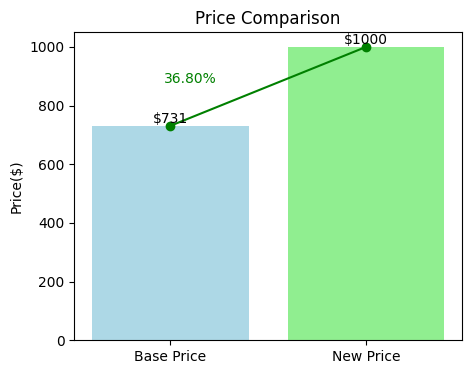

In [5]:
import ipywidgets as widgets
from IPython.display import display, HTML,clear_output, Javascript
import numpy as np
import warnings
import joblib
from datetime import timedelta
import matplotlib.pyplot as plt

warnings.filterwarnings("ignore")

    
global counter
global Base_prediction
global compare_prediction
global compare_counter
counter = 0
compare_counter = 0

with open('xgb_model_Windows_v5.joblib', 'rb') as file:
    model_joblib = joblib.load(file)

CPU_mapping_table = pd.read_csv('./Mean Encoding Mapping Tables 1/CPU Brand_mapping_table.csv')
GPU_mapping_table = pd.read_csv('./Mean Encoding Mapping Tables 1/GPU_MODEL_mapping_table.csv')
OEM_mapping_table = pd.read_csv('./Mean Encoding Mapping Tables 1/OEMGROUP_mapping_table.csv')
OS_Edition_mapping_table = pd.read_csv('./Mean Encoding Mapping Tables 1/OS_EDITION_mapping_table.csv')
OS_Version_mapping_table = pd.read_csv('./Mean Encoding Mapping Tables 1/OS_VERSION_mapping_table.csv')
SS_mapping_table = pd.read_csv('./Mean Encoding Mapping Tables 1/SCREEN_SIZE_INCHES_mapping_table.csv')
StorageType_mapping_table = pd.read_csv('./Mean Encoding Mapping Tables 1/STORAGE_TYPE_mapping_table.csv')
Formfactor_mapping_table = pd.read_csv('./Mean Encoding Mapping Tables 1/SUBFORMFACTOR_mapping_table.csv')
Touchscreen_mapping_table = pd.read_csv('./Mean Encoding Mapping Tables 1/TOUCHSCREEN_mapping_table.csv')
Series_mapping_table = pd.read_csv('./Mean Encoding Mapping Tables 1/Series_mapping_table.csv')
CPU_Family_mapping_table = pd.read_csv('./Mean Encoding Mapping Tables 1/CPU Family_mapping_table.csv')
CPU_Line_mapping_table = pd.read_csv('./Mean Encoding Mapping Tables 1/CPU Line_mapping_table.csv')
Screen_Res_mapping_table = pd.read_csv('./Mean Encoding Mapping Tables 1/Screen_Resolution_mapping_table.csv')


CPU_dict = CPU_mapping_table.set_index('CPU Brand')['CPU Brand_mean_encoded'].to_dict()
OEM_dict = OEM_mapping_table.set_index('OEMGROUP')['OEMGROUP_mean_encoded'].to_dict()
SS_dict = SS_mapping_table.set_index('SCREEN_SIZE_INCHES')['SCREEN_SIZE_INCHES_mean_encoded'].to_dict()
StorageType_dict = StorageType_mapping_table.set_index('STORAGE_TYPE')['STORAGE_TYPE_mean_encoded'].to_dict()
FormFactor_dict = Formfactor_mapping_table.set_index('SUBFORMFACTOR')['SUBFORMFACTOR_mean_encoded'].to_dict()
GPU_dict = GPU_mapping_table.set_index('GPU_MODEL')['GPU_MODEL_mean_encoded'].to_dict()
OS_VERSION_dict = OS_Version_mapping_table.set_index('OS_VERSION')['OS_VERSION_mean_encoded'].to_dict()
OS_Edition_dict = OS_Edition_mapping_table.set_index('OS_EDITION')['OS_EDITION_mean_encoded'].to_dict()
Touch_dict = Touchscreen_mapping_table.set_index('TOUCHSCREEN')['TOUCHSCREEN_mean_encoded'].to_dict()
Series_dict = Series_mapping_table.set_index('Series')['Series_mean_encoded'].to_dict()
CPU_fam_dict = CPU_Family_mapping_table.set_index('CPU Family')['CPU Family_mean_encoded'].to_dict()
CPU_line_dict = CPU_Line_mapping_table.set_index('CPU Line')['CPU Line_mean_encoded'].to_dict()
Screen_Res_dict = Screen_Res_mapping_table.set_index('Screen_Resolution')['Screen_Resolution_mean_encoded'].to_dict()






def predict(FormFactor, OEM, CPU, CPU_Core, CPU_MHz, RAM,Storage_Capacity,Storage_Type,Screen_Size,GPU,OS_Edition,OS_Version,Touchscreen,Series,CPU_Fam,CPU_Line,Screen_Res):
    
    RAM_mapping = {'4 GB': 4096.0, '6 GB': 6144.0, '8 GB': 8192.0, '12 GB': 12288.0, '16 GB': 16384.0, '20 GB': 20480.0, '24 GB': 24576.0, '32 GB': 32768.0, '40 GB': 40960.0, '48 GB': 49152.0, '64 GB': 65536.0, '128 GB': 131072.0}
    RAM_encoded = RAM_mapping[RAM]
    StorageCap_mapping = {'64 GB': 64.0, '256 GB': 256.0, '512 GB': 512.0, '1000 GB': 1000.0, '1128 GB': 1128.0, '1256 GB': 1256.0, '1512 GB': 1512.0, '2000 GB': 2000.0, '2256 GB': 2256.0, '2512 GB': 2512.0, '3000 GB': 3000.0, '4000 GB': 4000.0}
    StorageCap_encoded = StorageCap_mapping[Storage_Capacity]
    CPU_encoded = CPU_dict[CPU.lower()]
    GPU_encoded = GPU_dict[GPU.lower()]
    OEM_encoded = OEM_dict[OEM.lower()]
    SS_encoded = SS_dict[str(Screen_Size)]
    StorageType_encoded = StorageType_dict[Storage_Type.lower()]
    Formfactor_encoded = FormFactor_dict[FormFactor.lower()]
    OS_version_encoded = OS_VERSION_dict[OS_Version.lower()]
    OS_Ediiton_encoded = OS_Edition_dict[OS_Edition.lower()]
    Touch_encoded = Touch_dict[Touchscreen.lower()]
    Series_encoded = Series_dict[Series.lower()]
    CPU_Fam_encoded = CPU_fam_dict[CPU_Fam.lower()]
    CPU_line_encoded = CPU_line_dict[CPU_Line.lower()]
    Screen_res_encoded = Screen_Res_dict[Screen_Res.lower()]
    new_data = [CPU_MHz, CPU_Core,RAM_encoded,StorageCap_encoded,Formfactor_encoded,OEM_encoded,OS_Ediiton_encoded,975.051454972091,SS_encoded,Touch_encoded,GPU_encoded,StorageType_encoded,OS_version_encoded,CPU_encoded,Series_encoded,CPU_Fam_encoded,CPU_line_encoded,Screen_res_encoded]
    new_data_array = np.array(new_data).reshape(1, -1)
    ads = pd.read_csv('ADS Final.csv')
    X = ads.drop(['PRICE'], axis=1)

    # Standardize the features using StandardScaler
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Apply PCA with 8 components
    pca = PCA(n_components=10)
    X_pca_optimal = pca.fit_transform(X_scaled)

# Standardize the features using the same scaler used during training
    new_data_scaled = scaler.transform(new_data_array)

    # Apply PCA transformation using the same PCA object used during training
    new_data_pca = pca.transform(new_data_scaled)
    new_data_prediction = model_joblib.predict(new_data_pca)

    return f"Base Price: ${int(new_data_prediction[0])}"


compare_widgets = {
    'FormFactor' : widgets.Dropdown(options=['Convertible','Detachable','Ultraslim Notebook','Traditional Notebook'], value= 'Ultraslim Notebook' , description='FormFactor'),
'OEM' : widgets.Dropdown(options=['Acer','Asus','Dell','Hp','Lenovo','Microsoft','Panasonic','Samsung','toshiba'], value= 'Asus' , description='OEM'),
'Series' : widgets.Dropdown(options=['Aero','Alienware','Aorus','Aspire','Asus F Series','Asus Fx Series','Asus G Series','Asus K Series','Asus Q Series','Asus Unknown','Asus X Series','Blade','Conceptd','Corsair Voyager','Elitebook','Elitebook X360','Enduro','Envy','Envy X360','Evoo','Expertbook','Force','G15','G16','G3','G5','G7','Galaxy Book','Galaxy Book 2','Galaxy Book 360','Galaxy Book Pro','Galaxy Book Pro 360','Galaxy Tab Pro','Gateway','Gigabyte A5','Gigabyte A7','Gigabyte G5','Gigabyte Ultra','Gram','Hp 200','Hp 400','Hp Chromebook','Hp Laptop','Hp Mobile Thin Client','Hp Thin Clients','Ideapad','Ideapad Duet','Ideapad Flex','Ideapad Gaming','Ideapad Yoga','Inspiron','Katana','Latitude','Legion','Lenovo C940 Yoga','Lenovo Flex','Lenovo V','Lenovo V14','Lenovo V15','Leopard','Loq','Modern','Msi','Msi - Alpha Series','Msi - Bravo Series','Msi - Creator Pro Series','Msi - Creator Series','Msi - Crosshair Series','Msi - Delta Series','Msi - Ge Series','Msi - Gs Series','Msi - Gt Series','Msi - Gv Series','Msi - We Series','Msi - Wf Series','Msi - Ws Series','Msi Thin','Msi- P Series','Nitro','Omen','Other','Pavilion','Pavilion Gaming','Pavilion X360','Porsch','Precision','Predator','Prestige','Probook','Probook X360','Pulse','Razer Book','Rog','Rog Flow','Rog Zephyrus','Samsung Notebook','Satellite','Spectre','Spectre X360','Spin','Stealth','Studiobook','Summit','Surface','Surface Book','Surface Go','Surface Laptop','Surface Laptop Go','Surface Laptop Studio','Surface Pro','Surface Studio','Swift','Swift Go','Sword','Tecra','Thinkbook','Thinkpad','Thompson Neo','Tracer','Travelmate','Travelmate Spin','Tuf','Undefined','Vaio','Vector','Victus','Vivobook','Vivobook Flip','Vivobook Pro','Vivobook Slate','Vostro','Wind','Xpg Xenia','Xps','Xps 2 In 1','Yoga','Zbook','Zenbook','Zenbook Flip','Zenbook Pro'], value= 'Vivobook' , description='Series'),
'CPU' : widgets.Dropdown(options=['A10','A12','A4','A6','A8','A9','Ath','Atom','Ci3','Ci5','Ci7','Ci9','Cm','Cm3','Icp','Ipp','Phenom','R3','R5','R7','R9','Snapdragon','Xeon'], value= 'Ci5' , description='CPU Brand'),
'CPU_Fam' : widgets.Dropdown(options=['Kaby Lake Refresh', 'Ice Lake', 'Kaby Lake', 'Sky Lake','Tiger Lake', 'Alder Lake', 'Renoir', 'Comet Lake', 'Unknown','Rembrandt', 'Whsikey Lake', 'Picasso', 'Lucienne', 'Raven Ridge','Cezanne', 'Coffee Lake Refresh', 'Raptor Lake', 'Barcelo_R','Dali', 'Amber Lake', 'Mendocino', 'Coffee Lake', 'Rembrandt_R','Phoenix', 'Broadwell', 'Dragon_Range'], value= 'Raptor Lake' , description='CPU Family'),
'CPU_Line' : widgets.Dropdown(options=['U', 'S', 'Unknown', 'P', 'H', 'G', 'Y', 'HX', 'HS', 'N', 'X'], value= 'U' , description='CPU Line'),
'CPU_Core' : widgets.Dropdown(options=[1, 2, 3, 4, 5, 6, 8, 10, 12, 14, 16, 18, 20, 24], value= 10 , description='CPU Cores'),
'CPU_MHz' : widgets.Dropdown(options=[800, 850, 900, 1000, 1040, 1100, 1200, 1300, 1330, 1400, 1440, 1460, 1500, 1600, 1660, 1700, 1800, 1830, 1900, 2000, 2100, 2160, 2170, 2200, 2260, 2300, 2400, 2500, 2530, 2550, 2600, 2666, 2700, 2800, 2900, 2960, 3000, 3100, 3150, 3200, 3250, 3300, 3400, 3500, 3600, 3700, 3800, 3900, 4000, 4100, 4200, 4300, 4400, 4600, 4700, 4800], value= 3600 , description='CPU MHz'),
'RAM' : widgets.Dropdown(options=['4 GB','6 GB','8 GB','12 GB','16 GB','20 GB','24 GB','32 GB',' 40 GB','48 GB','64 GB','128 GB'], value='16 GB', description='RAM'),
'Storage_Capacity' : widgets.Dropdown(options=['64 GB','256 GB','512 GB','1000 GB','1128 GB','1256 GB','1512 GB','2000 GB','2256 GB','2512 GB','3000 GB','4000 GB'], value= '512 GB' , description='Storage Capacity'),
'Storage_Type' : widgets.Dropdown(options=['eMMC','HDD','HDD & Optane','HDD+SSD','Hybrid','SSD','SSD & Optane'], value= 'SSD' , description='Storage Type'),
'Screen_Size' : widgets.Dropdown(options=[8,8.9,10,10.1,10.3,10.5,10.6,10.8,11,11.6,12,12.1,12.3,12.4,12.5,13,13.3,13.4,13.5,13.9,14,14.1,14.2,14.4,14.5,15,15.4,15.5,15.6,16,16.1,17,17.3,18,27], value= 15.6 , description='Screen Size'),
'Screen_Res' : widgets.Dropdown(options=['1366x768','1600x768','1600x900','1536x1024','1920x1080','1920x1200','1920x1280','2240x1400','2560x1440','2256x1504','2560x1600','2880x1800','2880x1920','3072x1920','3840x2160'], value= '1920x1080' , description='Screen Resolution'),
'GPU' : widgets.Dropdown(options=['Amd Integrated Graphics','Amd Radeon 520','Amd Radeon 530','Amd Radeon 540','Amd Radeon 540X','Amd Radeon 610M','Amd Radeon 6600M','Amd Radeon 660M','Amd Radeon 680M','Amd Radeon 780M','Amd Radeon Graphics','Amd Radeon Pro Wx 3100','Amd Radeon Pro Wx 3200','Amd Radeon R2','Amd Radeon R3','Amd Radeon R4','Amd Radeon R5','Amd Radeon R5 M335','Amd Radeon R6','Amd Radeon R7','Amd Radeon R7 M270','Amd Radeon R7 M445','Amd Radeon Rx 540','Amd Radeon Rx 5500M','Amd Radeon Rx 5600M','Amd Radeon Rx 560X','Amd Radeon Rx 580','Amd Radeon Rx 6500 Xt','Amd Radeon Rx 6500M','Amd Radeon Rx 6550M','Amd Radeon Rx 6600 Xt','Amd Radeon Rx 6650M','Amd Radeon Rx 6700M','Amd Radeon Rx 6700S','Amd Radeon Rx 6800M','Amd Radeon Rx 6800S','Amd Radeon Rx 7600S','Amd Radeon Rx Vega 10','Amd Radeon Rx Vega 11','Amd Radeon Rx Vega 5','Amd Radeon Rx Vega 6','Amd Radeon Rx Vega 8','Amd Radeon Rx Vega 870','Amd Radeon Rx Vega M Gl','Amd Radeon Vega','Amd Radeon Vega 10','Amd Radeon Vega 6','Amd Radeon Vega 7','Amd Radeon Vega 8','Amd Radeon Vega 9','Ati Mobility Radeon Hd4250','Ati Mobility Radeon Hd6570','Ati Mobility Radeon Xpress 1150','Ati Radeon Hd 6310','Ati Radeon Hd 6570','Ati Radeon Hd 6850M','Ati Radeon Hd 6970M','Ati Radeon Hd 7690M','Ati Radeon Hd 7850M','Ati Radeon Hd 8210','Ati Radeon Hd 8330','Ati Radeon Hd 8350G','Ati Radeon Hd 8400','Ati Radeon Hd 8450G','Ati Radeon Hd 8550G','Ati Radeon X1270','Intel Arc A350M Graphics','Intel Arc A370M Graphics','Intel Gma 4500M','Intel Gma 4500Mhd','Intel Gma 950','Intel Gma X4500Hd','Intel Hd Graphics','Intel Hd Graphics 3000','Intel Hd Graphics 400','Intel Hd Graphics 4000','Intel Hd Graphics 405','Intel Hd Graphics 4200','Intel Hd Graphics 4400','Intel Hd Graphics 4600','Intel Hd Graphics 500','Intel Hd Graphics 5000','Intel Hd Graphics 505','Intel Hd Graphics 510','Intel Hd Graphics 515','Intel Hd Graphics 520','Intel Hd Graphics 530','Intel Hd Graphics 5300','Intel Hd Graphics 5500','Intel Hd Graphics 610','Intel Hd Graphics 615','Intel Hd Graphics 620','Intel Hd Graphics 630','Intel Hd Graphics P530','Intel Integrated Graphics','Intel Iris Graphics 5100','Intel Iris Graphics 540','Intel Iris Plus Graphics','Intel Iris Plus Graphics 640','Intel Iris Plus Graphics 950','Intel Iris Plus Graphics G7','Intel Iris Xe Graphics','Intel Iris Xe Max Graphics','Intel Uhd Graphics','Intel Uhd Graphics 600','Intel Uhd Graphics 605','Intel Uhd Graphics 610','Intel Uhd Graphics 615','Intel Uhd Graphics 620','Intel Uhd Graphics 630','Intel Uhd Graphics 750','Intel Uhd Graphics 770','Intel Uhd Graphics G1','Intel Uma','Not Provided','Nvdia Rtx A1000','Nvidia Geforce','Nvidia Geforce 820M','Nvidia Geforce 8400M Gs','Nvidia Geforce 840M','Nvidia Geforce 920Mx','Nvidia Geforce 930M','Nvidia Geforce 930Mx','Nvidia Geforce 940M','Nvidia Geforce 940Mx','Nvidia Geforce Gt330M','Nvidia Geforce Gt540M','Nvidia Geforce Gt555M','Nvidia Geforce Gt650M','Nvidia Geforce Gt750M','Nvidia Geforce Gt840M','Nvidia Geforce Gtx 1050','Nvidia Geforce Gtx 1050 Ti','Nvidia Geforce Gtx 1060','Nvidia Geforce Gtx 1070','Nvidia Geforce Gtx 1080','Nvidia Geforce Gtx 1650','Nvidia Geforce Gtx 1650 Max-Q','Nvidia Geforce Gtx 1650Ti','Nvidia Geforce Gtx 1650Ti Max-Q','Nvidia Geforce Gtx 1660 Ti','Nvidia Geforce Gtx 675M','Nvidia Geforce Gtx 765M','Nvidia Geforce Gtx 860M','Nvidia Geforce Gtx 950M','Nvidia Geforce Gtx 960M','Nvidia Geforce Gtx 965M','Nvidia Geforce Gtx 970M','Nvidia Geforce Gtx 980M','Nvidia Geforce Gtx Gpu','Nvidia Geforce Mx130','Nvidia Geforce Mx150','Nvidia Geforce Mx250','Nvidia Geforce Mx330','Nvidia Geforce Mx350','Nvidia Geforce Mx450','Nvidia Geforce Mx550','Nvidia Geforce Mx570','Nvidia Geforce Rtx 2050','Nvidia Geforce Rtx 2060','Nvidia Geforce Rtx 2060 Max-Q','Nvidia Geforce Rtx 2070','Nvidia Geforce Rtx 2070 Max-Q','Nvidia Geforce Rtx 2070 Super','Nvidia Geforce Rtx 2070 Super Max-Q','Nvidia Geforce Rtx 2080','Nvidia Geforce Rtx 2080 Super','Nvidia Geforce Rtx 2080 Super Max-Q','Nvidia Geforce Rtx 3050','Nvidia Geforce Rtx 3050 Max-Q','Nvidia Geforce Rtx 3050 Ti','Nvidia Geforce Rtx 3060','Nvidia Geforce Rtx 3060 Ti','Nvidia Geforce Rtx 3070','Nvidia Geforce Rtx 3070 Ti','Nvidia Geforce Rtx 3080','Nvidia Geforce Rtx 3080 Ti','Nvidia Geforce Rtx 4050','Nvidia Geforce Rtx 4060','Nvidia Geforce Rtx 4070','Nvidia Geforce Rtx 4080','Nvidia Geforce Rtx 4090','Nvidia Mx230','Nvidia Quadro M1000M','Nvidia Quadro M1200','Nvidia Quadro M2000M','Nvidia Quadro M2200','Nvidia Quadro M520','Nvidia Quadro M620','Nvidia Quadro P1000','Nvidia Quadro P2000','Nvidia Quadro P3000','Nvidia Quadro P3200','Nvidia Quadro P500','Nvidia Quadro P520','Nvidia Quadro P600','Nvidia Quadro P620','Nvidia Quadro Rtx 3000','Nvidia Quadro Rtx 4000','Nvidia Quadro Rtx 5000','Nvidia Quadro Rtx 6000','Nvidia Quadro T1000','Nvidia Quadro T1200','Nvidia Quadro T2000','Nvidia Quadro T500','Nvidia Rtx 2000 Ada','Nvidia Rtx 3500','Nvidia Rtx 4000','Nvidia Rtx A2000','Nvidia Rtx A3000','Nvidia Rtx A4000','Nvidia Rtx A4500','Nvidia Rtx A500','Nvidia Rtx A5000','Nvidia Rtx A5500','Nvidia T1200','Nvidia T550','Nvidia T600','Qualcomm Adreno','Qualcomm Adreno 540','Qualcomm Adreno 618','Qualcomm Adreno 630','Qualcomm Adreno 690','Radeon Hd Graphics','Radeon Pro Wx 4130','Radeon Pro Wx 4150','Radeon Rx 6700Xt','Radeon Vega 3'], value= 'Intel Hd Graphics' , description='GPU Model'),
'OS_Version' : widgets.Dropdown(options=['Windows 10','Windows 11','Windows 7','Windows 8','Windows legacy','Windows vista','Windows xp'], value= 'Windows 11' , description='OS Version'),
'OS_Edition' : widgets.Dropdown(options=['Windows 10 home','Windows 10 iot enterprise','Windows 10 pro','Windows 10 s','Windows 11 home','Windows 11 pro','Windows 11se','Windows 1998','Windows 7 home basic','Windows 7 home premium','Windows 7 home premium 64-bit'], value= 'Windows 11 home' , description='OS Edition'),
'Touchscreen' : widgets.Dropdown(options=['Yes', 'No'], value='No', description='Touchscreen')

}

FormFactor = widgets.Dropdown(options=['Convertible','Detachable','Ultraslim Notebook','Traditional Notebook'], value= 'Ultraslim Notebook' , description='FormFactor')
OEM = widgets.Dropdown(options=['Acer','Asus','Dell','Hp','Lenovo','Microsoft','Panasonic','Samsung','toshiba'], value= 'Asus' , description='OEM')
Series = widgets.Dropdown(options=['Aero','Alienware','Aorus','Aspire','Asus F Series','Asus Fx Series','Asus G Series','Asus K Series','Asus Q Series','Asus Unknown','Asus X Series','Blade','Conceptd','Corsair Voyager','Elitebook','Elitebook X360','Enduro','Envy','Envy X360','Evoo','Expertbook','Force','G15','G16','G3','G5','G7','Galaxy Book','Galaxy Book 2','Galaxy Book 360','Galaxy Book Pro','Galaxy Book Pro 360','Galaxy Tab Pro','Gateway','Gigabyte A5','Gigabyte A7','Gigabyte G5','Gigabyte Ultra','Gram','Hp 200','Hp 400','Hp Chromebook','Hp Laptop','Hp Mobile Thin Client','Hp Thin Clients','Ideapad','Ideapad Duet','Ideapad Flex','Ideapad Gaming','Ideapad Yoga','Inspiron','Katana','Latitude','Legion','Lenovo C940 Yoga','Lenovo Flex','Lenovo V','Lenovo V14','Lenovo V15','Leopard','Loq','Modern','Msi','Msi - Alpha Series','Msi - Bravo Series','Msi - Creator Pro Series','Msi - Creator Series','Msi - Crosshair Series','Msi - Delta Series','Msi - Ge Series','Msi - Gs Series','Msi - Gt Series','Msi - Gv Series','Msi - We Series','Msi - Wf Series','Msi - Ws Series','Msi Thin','Msi- P Series','Nitro','Omen','Other','Pavilion','Pavilion Gaming','Pavilion X360','Porsch','Precision','Predator','Prestige','Probook','Probook X360','Pulse','Razer Book','Rog','Rog Flow','Rog Zephyrus','Samsung Notebook','Satellite','Spectre','Spectre X360','Spin','Stealth','Studiobook','Summit','Surface','Surface Book','Surface Go','Surface Laptop','Surface Laptop Go','Surface Laptop Studio','Surface Pro','Surface Studio','Swift','Swift Go','Sword','Tecra','Thinkbook','Thinkpad','Thompson Neo','Tracer','Travelmate','Travelmate Spin','Tuf','Undefined','Vaio','Vector','Victus','Vivobook','Vivobook Flip','Vivobook Pro','Vivobook Slate','Vostro','Wind','Xpg Xenia','Xps','Xps 2 In 1','Yoga','Zbook','Zenbook','Zenbook Flip','Zenbook Pro'], value= 'Vivobook' , description='Series')
CPU = widgets.Dropdown(options=['A10','A12','A4','A6','A8','A9','Ath','Atom','Ci3','Ci5','Ci7','Ci9','Cm','Cm3','Icp','Ipp','Phenom','R3','R5','R7','R9','Snapdragon','Xeon'], value= 'Ci5' , description='CPU Brand')
CPU_Fam = widgets.Dropdown(options=['Kaby Lake Refresh', 'Ice Lake', 'Kaby Lake', 'Sky Lake','Tiger Lake', 'Alder Lake', 'Renoir', 'Comet Lake', 'Unknown','Rembrandt', 'Whsikey Lake', 'Picasso', 'Lucienne', 'Raven Ridge','Cezanne', 'Coffee Lake Refresh', 'Raptor Lake', 'Barcelo_R','Dali', 'Amber Lake', 'Mendocino', 'Coffee Lake', 'Rembrandt_R','Phoenix', 'Broadwell', 'Dragon_Range'], value= 'Raptor Lake' , description='CPU Family')
CPU_Line = widgets.Dropdown(options=['U', 'S', 'Unknown', 'P', 'H', 'G', 'Y', 'HX', 'HS', 'N', 'X'], value= 'U' , description='CPU Line')
CPU_Core = widgets.Dropdown(options=[1, 2, 3, 4, 5, 6, 8, 10, 12, 14, 16, 18, 20, 24], value= 10 , description='CPU Cores')
CPU_MHz = widgets.Dropdown(options=[800, 850, 900, 1000, 1040, 1100, 1200, 1300, 1330, 1400, 1440, 1460, 1500, 1600, 1660, 1700, 1800, 1830, 1900, 2000, 2100, 2160, 2170, 2200, 2260, 2300, 2400, 2500, 2530, 2550, 2600, 2666, 2700, 2800, 2900, 2960, 3000, 3100, 3150, 3200, 3250, 3300, 3400, 3500, 3600, 3700, 3800, 3900, 4000, 4100, 4200, 4300, 4400, 4600, 4700, 4800], value= 3600 , description='CPU MHz')
RAM = widgets.Dropdown(options=['4 GB','6 GB','8 GB','12 GB','16 GB','20 GB','24 GB','32 GB',' 40 GB','48 GB','64 GB','128 GB'], value='16 GB', description='RAM')
Storage_Capacity = widgets.Dropdown(options=['64 GB','256 GB','512 GB','1000 GB','1128 GB','1256 GB','1512 GB','2000 GB','2256 GB','2512 GB','3000 GB','4000 GB'], value= '512 GB' , description='Storage Capacity')
Storage_Type = widgets.Dropdown(options=['eMMC','HDD','HDD & Optane','HDD+SSD','Hybrid','SSD','SSD & Optane'], value= 'SSD' , description='Storage Type')
Screen_Size = widgets.Dropdown(options=[8,8.9,10,10.1,10.3,10.5,10.6,10.8,11,11.6,12,12.1,12.3,12.4,12.5,13,13.3,13.4,13.5,13.9,14,14.1,14.2,14.4,14.5,15,15.4,15.5,15.6,16,16.1,17,17.3,18,27], value= 15.6 , description='Screen Size')
Screen_Res = widgets.Dropdown(options=['1366x768','1600x768','1600x900','1536x1024','1920x1080','1920x1200','1920x1280','2240x1400','2560x1440','2256x1504','2560x1600','2880x1800','2880x1920','3072x1920','3840x2160'], value= '1920x1080' , description='Screen Resolution')
GPU = widgets.Dropdown(options=['Amd Integrated Graphics','Amd Radeon 520','Amd Radeon 530','Amd Radeon 540','Amd Radeon 540X','Amd Radeon 610M','Amd Radeon 6600M','Amd Radeon 660M','Amd Radeon 680M','Amd Radeon 780M','Amd Radeon Graphics','Amd Radeon Pro Wx 3100','Amd Radeon Pro Wx 3200','Amd Radeon R2','Amd Radeon R3','Amd Radeon R4','Amd Radeon R5','Amd Radeon R5 M335','Amd Radeon R6','Amd Radeon R7','Amd Radeon R7 M270','Amd Radeon R7 M445','Amd Radeon Rx 540','Amd Radeon Rx 5500M','Amd Radeon Rx 5600M','Amd Radeon Rx 560X','Amd Radeon Rx 580','Amd Radeon Rx 6500 Xt','Amd Radeon Rx 6500M','Amd Radeon Rx 6550M','Amd Radeon Rx 6600 Xt','Amd Radeon Rx 6650M','Amd Radeon Rx 6700M','Amd Radeon Rx 6700S','Amd Radeon Rx 6800M','Amd Radeon Rx 6800S','Amd Radeon Rx 7600S','Amd Radeon Rx Vega 10','Amd Radeon Rx Vega 11','Amd Radeon Rx Vega 5','Amd Radeon Rx Vega 6','Amd Radeon Rx Vega 8','Amd Radeon Rx Vega 870','Amd Radeon Rx Vega M Gl','Amd Radeon Vega','Amd Radeon Vega 10','Amd Radeon Vega 6','Amd Radeon Vega 7','Amd Radeon Vega 8','Amd Radeon Vega 9','Ati Mobility Radeon Hd4250','Ati Mobility Radeon Hd6570','Ati Mobility Radeon Xpress 1150','Ati Radeon Hd 6310','Ati Radeon Hd 6570','Ati Radeon Hd 6850M','Ati Radeon Hd 6970M','Ati Radeon Hd 7690M','Ati Radeon Hd 7850M','Ati Radeon Hd 8210','Ati Radeon Hd 8330','Ati Radeon Hd 8350G','Ati Radeon Hd 8400','Ati Radeon Hd 8450G','Ati Radeon Hd 8550G','Ati Radeon X1270','Intel Arc A350M Graphics','Intel Arc A370M Graphics','Intel Gma 4500M','Intel Gma 4500Mhd','Intel Gma 950','Intel Gma X4500Hd','Intel Hd Graphics','Intel Hd Graphics 3000','Intel Hd Graphics 400','Intel Hd Graphics 4000','Intel Hd Graphics 405','Intel Hd Graphics 4200','Intel Hd Graphics 4400','Intel Hd Graphics 4600','Intel Hd Graphics 500','Intel Hd Graphics 5000','Intel Hd Graphics 505','Intel Hd Graphics 510','Intel Hd Graphics 515','Intel Hd Graphics 520','Intel Hd Graphics 530','Intel Hd Graphics 5300','Intel Hd Graphics 5500','Intel Hd Graphics 610','Intel Hd Graphics 615','Intel Hd Graphics 620','Intel Hd Graphics 630','Intel Hd Graphics P530','Intel Integrated Graphics','Intel Iris Graphics 5100','Intel Iris Graphics 540','Intel Iris Plus Graphics','Intel Iris Plus Graphics 640','Intel Iris Plus Graphics 950','Intel Iris Plus Graphics G7','Intel Iris Xe Graphics','Intel Iris Xe Max Graphics','Intel Uhd Graphics','Intel Uhd Graphics 600','Intel Uhd Graphics 605','Intel Uhd Graphics 610','Intel Uhd Graphics 615','Intel Uhd Graphics 620','Intel Uhd Graphics 630','Intel Uhd Graphics 750','Intel Uhd Graphics 770','Intel Uhd Graphics G1','Intel Uma','Not Provided','Nvdia Rtx A1000','Nvidia Geforce','Nvidia Geforce 820M','Nvidia Geforce 8400M Gs','Nvidia Geforce 840M','Nvidia Geforce 920Mx','Nvidia Geforce 930M','Nvidia Geforce 930Mx','Nvidia Geforce 940M','Nvidia Geforce 940Mx','Nvidia Geforce Gt330M','Nvidia Geforce Gt540M','Nvidia Geforce Gt555M','Nvidia Geforce Gt650M','Nvidia Geforce Gt750M','Nvidia Geforce Gt840M','Nvidia Geforce Gtx 1050','Nvidia Geforce Gtx 1050 Ti','Nvidia Geforce Gtx 1060','Nvidia Geforce Gtx 1070','Nvidia Geforce Gtx 1080','Nvidia Geforce Gtx 1650','Nvidia Geforce Gtx 1650 Max-Q','Nvidia Geforce Gtx 1650Ti','Nvidia Geforce Gtx 1650Ti Max-Q','Nvidia Geforce Gtx 1660 Ti','Nvidia Geforce Gtx 675M','Nvidia Geforce Gtx 765M','Nvidia Geforce Gtx 860M','Nvidia Geforce Gtx 950M','Nvidia Geforce Gtx 960M','Nvidia Geforce Gtx 965M','Nvidia Geforce Gtx 970M','Nvidia Geforce Gtx 980M','Nvidia Geforce Gtx Gpu','Nvidia Geforce Mx130','Nvidia Geforce Mx150','Nvidia Geforce Mx250','Nvidia Geforce Mx330','Nvidia Geforce Mx350','Nvidia Geforce Mx450','Nvidia Geforce Mx550','Nvidia Geforce Mx570','Nvidia Geforce Rtx 2050','Nvidia Geforce Rtx 2060','Nvidia Geforce Rtx 2060 Max-Q','Nvidia Geforce Rtx 2070','Nvidia Geforce Rtx 2070 Max-Q','Nvidia Geforce Rtx 2070 Super','Nvidia Geforce Rtx 2070 Super Max-Q','Nvidia Geforce Rtx 2080','Nvidia Geforce Rtx 2080 Super','Nvidia Geforce Rtx 2080 Super Max-Q','Nvidia Geforce Rtx 3050','Nvidia Geforce Rtx 3050 Max-Q','Nvidia Geforce Rtx 3050 Ti','Nvidia Geforce Rtx 3060','Nvidia Geforce Rtx 3060 Ti','Nvidia Geforce Rtx 3070','Nvidia Geforce Rtx 3070 Ti','Nvidia Geforce Rtx 3080','Nvidia Geforce Rtx 3080 Ti','Nvidia Geforce Rtx 4050','Nvidia Geforce Rtx 4060','Nvidia Geforce Rtx 4070','Nvidia Geforce Rtx 4080','Nvidia Geforce Rtx 4090','Nvidia Mx230','Nvidia Quadro M1000M','Nvidia Quadro M1200','Nvidia Quadro M2000M','Nvidia Quadro M2200','Nvidia Quadro M520','Nvidia Quadro M620','Nvidia Quadro P1000','Nvidia Quadro P2000','Nvidia Quadro P3000','Nvidia Quadro P3200','Nvidia Quadro P500','Nvidia Quadro P520','Nvidia Quadro P600','Nvidia Quadro P620','Nvidia Quadro Rtx 3000','Nvidia Quadro Rtx 4000','Nvidia Quadro Rtx 5000','Nvidia Quadro Rtx 6000','Nvidia Quadro T1000','Nvidia Quadro T1200','Nvidia Quadro T2000','Nvidia Quadro T500','Nvidia Rtx 2000 Ada','Nvidia Rtx 3500','Nvidia Rtx 4000','Nvidia Rtx A2000','Nvidia Rtx A3000','Nvidia Rtx A4000','Nvidia Rtx A4500','Nvidia Rtx A500','Nvidia Rtx A5000','Nvidia Rtx A5500','Nvidia T1200','Nvidia T550','Nvidia T600','Qualcomm Adreno','Qualcomm Adreno 540','Qualcomm Adreno 618','Qualcomm Adreno 630','Qualcomm Adreno 690','Radeon Hd Graphics','Radeon Pro Wx 4130','Radeon Pro Wx 4150','Radeon Rx 6700Xt','Radeon Vega 3'], value= 'Intel Hd Graphics' , description='GPU Model')
OS_Version = widgets.Dropdown(options=['Windows 10','Windows 11','Windows 7','Windows 8','Windows legacy','Windows vista','Windows xp'], value= 'Windows 11' , description='OS Version')
OS_Edition = widgets.Dropdown(options=['Windows 10 home','Windows 10 iot enterprise','Windows 10 pro','Windows 10 s','Windows 11 home','Windows 11 pro','Windows 11se','Windows 1998','Windows 7 home basic','Windows 7 home premium','Windows 7 home premium 64-bit'], value= 'Windows 11 home' , description='OS Edition')
Touchscreen = widgets.Dropdown(options=['Yes', 'No'], value='No', description='Touchscreen')


output_text = widgets.Output()

def disable_widgets():
    FormFactor.disabled = True
    OEM.disabled = True
    Series.disabled = True
    CPU.disabled = True
    CPU_Fam.disabled = True
    CPU_Line.disabled = True
    CPU_Core.disabled = True
    CPU_MHz.disabled = True
    RAM.disabled = True
    Storage_Capacity.disabled = True
    Storage_Type.disabled = True
    Screen_Size.disabled = True
    Screen_Res.disabled = True
    GPU.disabled = True
    OS_Version.disabled = True
    OS_Edition.disabled = True
    Touchscreen.disabled = True
    
def enable_widgets():
    FormFactor.disabled = False
    OEM.disabled = False
    Series.disabled = False
    CPU.disabled = False
    CPU_Fam.disabled = False
    CPU_Line.disabled = False
    CPU_Core.disabled = False
    CPU_MHz.disabled = False
    RAM.disabled = False
    Storage_Capacity.disabled = False
    Storage_Type.disabled = False
    Screen_Size.disabled = False
    Screen_Res.disabled = False
    GPU.disabled = False
    OS_Version.disabled = False
    OS_Edition.disabled = False
    Touchscreen.disabled = False
    
def on_clear_all_button_click(b):
    display(Javascript('IPython.notebook.execute_cell()'))
    
def on_compare_predict_button_click(b):
    global compare_prediction
    global Base_prediction
    
    prediction_1 = Base_prediction.split(':')[-1]
    prediction_1 = prediction_1.split(' ')  

    result = predict(compare_widgets['FormFactor'].value , compare_widgets['OEM'].value , compare_widgets['CPU'].value , compare_widgets['CPU_Core'].value , compare_widgets['CPU_MHz'].value , compare_widgets['RAM'].value , compare_widgets['Storage_Capacity'].value , compare_widgets['Storage_Type'].value , compare_widgets['Screen_Size'].value , compare_widgets['GPU'].value , compare_widgets['OS_Edition'].value , compare_widgets['OS_Version'].value , compare_widgets['Touchscreen'].value ,compare_widgets['Series'].value, compare_widgets['CPU_Fam'].value, compare_widgets['CPU_Line'].value, compare_widgets['Screen_Res'].value)
    prediction_2 = result.split(':')[-1]
    #print(f'Comparison prediction:{prediction_2}')
    prediction_2 = prediction_2.split(' ')
    print(f"New Price: {prediction_2[1]}")
    price1 = int(prediction_1[1].split('$')[-1])
    price2 = int(prediction_2[1].split('$')[-1])
    price_diff = price2 - price1
    print(f"Price Difference: ${price_diff}")

    # Plotting the bar graph with annotations
    labels = ['Base Price', 'New Price']
    values = [price1, price2]

    fig, ax = plt.subplots(figsize=(5, 4))  # Adjust the figure size

    bars = plt.bar(labels, values, color=['lightblue', 'lightgreen'])

    # Adding annotations for total minutes
    for bar, value in zip(bars, values):
        annotation_text = f'${value}'
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.1, annotation_text, ha='center', va='bottom')
    percentage_change = ((price2 - price1) / price1) * 100

# Add slope line
    slope_color = 'green' if percentage_change >= 0 else 'red'
    plt.plot([labels[0], labels[1]], [price1, price2], marker='o', linestyle='-', color=slope_color)

    # Adding annotations for percentage change
    percentage_annotation_text = f'{percentage_change:.2f}%'
    plt.text((bars[0].get_x() + bars[1].get_x()) / 2, (price1 + price2) / 2, percentage_annotation_text,
             ha='center', va='bottom', color=slope_color)


    plt.ylabel('Price($)')
    plt.title('Price Comparison')
    display(HTML("<style>.output{display:flex;justify-content:center;}</style>"))
    plt.show()
    
    
    
    
def on_button_click(b):
    global counter
    global Base_prediction
    global compare_counter
    counter+=1
    
    result = predict(FormFactor.value , OEM.value , CPU.value , CPU_Core.value , CPU_MHz.value , RAM.value , Storage_Capacity.value , Storage_Type.value , Screen_Size.value , GPU.value , OS_Edition.value , OS_Version.value , Touchscreen.value ,Series.value,CPU_Fam.value,CPU_Line.value,Screen_Res.value)
    print(result)
    if counter == 1:
        display(compare_button)
        Base_prediction = result

def on_compare_button_click(b):
    global Base_prediction
    button.layout.display = 'none'
    compare_button.layout.display = 'none'
    with output_text:
        output_text.clear_output()
    compare_predict_button.on_click(on_compare_predict_button_click)
    clear_all_button.on_click(on_clear_all_button_click)
    prediction_1 = Base_prediction.split(':')[-1]
    #print(f'Base prediction:{prediction_1}')
    button_box = widgets.HBox([compare_predict_button, clear_all_button])
    display(button_box)
    
    disable_widgets()
    for feature, widget in compare_widgets.items():
        widget.layout.visibility = 'visible'
        
        
button = widgets.Button(description='Predict', style={'button_color': 'rgb(169,169,169)'})  
compare_button = widgets.Button(description='Compare', style={'button_color': 'rgb(169,169,169)'})
compare_predict_button = widgets.Button(description='Predict', style={'button_color': 'rgb(169,169,169)'})
clear_all_button = widgets.Button(description='Clear all', style={'button_color': 'rgb(169,169,169)'}) 

def update_button_visibility(change):
    button.disabled = not (FormFactor.value and OEM.value and CPU.value and CPU_Fam.value and CPU_Line.value and CPU_Core.value and CPU_MHz.value and RAM.value and Storage_Capacity.value and Storage_Type.value and Screen_Size.value and Screen_Res.value and GPU.value and OS_Edition.value and OS_Version.value and Touchscreen.value and Series.value)
    if not button.disabled:
        button.style.button_color = 'rgb(0,128,0)' 
    else:
        button.style.button_color = 'rgb(169,169,169)'

FormFactor.observe(update_button_visibility, names='value')
OEM.observe(update_button_visibility, names='value')
Series.observe(update_button_visibility, names='value')
CPU.observe(update_button_visibility, names='value')
CPU_Fam.observe(update_button_visibility, names='value')
CPU_Line.observe(update_button_visibility, names='value')
CPU_Core.observe(update_button_visibility, names='value')
CPU_MHz.observe(update_button_visibility, names='value')
RAM.observe(update_button_visibility, names='value')
Storage_Capacity.observe(update_button_visibility, names='value')
Storage_Type.observe(update_button_visibility, names='value')
Screen_Size.observe(update_button_visibility, names='value')
Screen_Res.observe(update_button_visibility, names='value')
GPU.observe(update_button_visibility, names='value')
OS_Version.observe(update_button_visibility, names='value')
OS_Edition.observe(update_button_visibility, names='value')
Touchscreen.observe(update_button_visibility, names='value')

title_html = HTML("<h5 style='color:maroon; text-align: center; font-size:25px;'>Device Price Prediction</h5>")
display(title_html)

button.on_click(on_button_click)

compare_button.on_click(on_compare_button_click)
if counter == 0:
    for feature, widget in compare_widgets.items():
        widget.layout.visibility = 'hidden'
    
base_layout = widgets.VBox([widgets.HBox([FormFactor,widgets.HTML(value='<div style="margin-right: 150px;"></div>'), compare_widgets['FormFactor']]),
                                  widgets.HBox([OEM,widgets.HTML(value='<div style="margin-right: 150px;"></div>'), compare_widgets['OEM']]),
                                  widgets.HBox([Series,widgets.HTML(value='<div style="margin-right: 150px;"></div>'), compare_widgets['Series']]),
                                  widgets.HBox([CPU,widgets.HTML(value='<div style="margin-right: 150px;"></div>'), compare_widgets['CPU']]),
                                  widgets.HBox([CPU_Fam,widgets.HTML(value='<div style="margin-right: 150px;"></div>'), compare_widgets['CPU_Fam']]),
                                  widgets.HBox([CPU_Line,widgets.HTML(value='<div style="margin-right: 150px;"></div>'), compare_widgets['CPU_Line']]),
                                  widgets.HBox([CPU_Core,widgets.HTML(value='<div style="margin-right: 150px;"></div>'), compare_widgets['CPU_Core']]),
                                  widgets.HBox([CPU_MHz,widgets.HTML(value='<div style="margin-right: 150px;"></div>'), compare_widgets['CPU_MHz']]),
                                  widgets.HBox([RAM,widgets.HTML(value='<div style="margin-right: 150px;"></div>'), compare_widgets['RAM']]),
                                  widgets.HBox([Storage_Capacity,widgets.HTML(value='<div style="margin-right: 150px;"></div>'), compare_widgets['Storage_Capacity']]),
                                  widgets.HBox([Storage_Type,widgets.HTML(value='<div style="margin-right: 150px;"></div>'), compare_widgets['Storage_Type']]),
                                  widgets.HBox([Screen_Size,widgets.HTML(value='<div style="margin-right: 150px;"></div>'), compare_widgets['Screen_Size']]),
                                  widgets.HBox([Screen_Res,widgets.HTML(value='<div style="margin-right: 150px;"></div>'), compare_widgets['Screen_Res']]),
                                  widgets.HBox([GPU,widgets.HTML(value='<div style="margin-right: 150px;"></div>'), compare_widgets['GPU']]),
                                  widgets.HBox([OS_Version,widgets.HTML(value='<div style="margin-right: 150px;"></div>'), compare_widgets['OS_Version']]),
                                  widgets.HBox([OS_Edition,widgets.HTML(value='<div style="margin-right: 150px;"></div>'), compare_widgets['OS_Edition']]),
                                  widgets.HBox([Touchscreen,widgets.HTML(value='<div style="margin-right: 150px;"></div>'), compare_widgets['Touchscreen']])
                                 ], layout=widgets.Layout(margin='0 0 0 20px'))
  
display(widgets.HBox([base_layout]))
display(button)
display(output_text)

SyntaxError: invalid syntax (3200850979.py, line 1)